In [9]:
import numpy as np
import pandas as pd
import glob
import os
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import norm

### Load file_name_filtered_with_dim_data_list

In [10]:
# get the file_name_filtered_with_dim_data_list

# Specify the directory
directory = r'C:\Users\yftac\Documents\00_Project_Afeka\ttc_calculation\03_filtered_with_dim_data'

# Get a list of files in the directory
files_in_directory = os.listdir(directory)

# Filter out directories, keeping only files
files = [f for f in files_in_directory if os.path.isfile(os.path.join(directory, f))]

file_name_filtered_with_dim_data_list=files
file_name_filtered_with_dim_data_list

['18_filtered_with_dim_data.csv',
 '19_filtered_with_dim_data.csv',
 '20_filtered_with_dim_data.csv',
 '21_filtered_with_dim_data.csv',
 '22_filtered_with_dim_data.csv',
 '23_filtered_with_dim_data.csv',
 '24_filtered_with_dim_data.csv',
 '25_filtered_with_dim_data.csv',
 '26_filtered_with_dim_data.csv',
 '27_filtered_with_dim_data.csv',
 '28_filtered_with_dim_data.csv',
 '29_filtered_with_dim_data.csv']

In [11]:
root_dir = r"C:\Users\yftac\Documents\00_Project_Afeka\ttc_calculation"

In [12]:
# print dataframes info and statastics
def load_dfs(file_name_filtered_with_dim_data_list, root_dir):
    os.chdir(root_dir)
    folder_name='03_filtered_with_dim_data'
    # change to working dir
    os.chdir(folder_name)
    
    dfs = []
    for i in range(len(file_name_filtered_with_dim_data_list)):
        df=pd.read_csv(file_name_filtered_with_dim_data_list[i])
        dfs.append(df)
    # change back to parent directory
    os.chdir('..')
    return dfs

dfs_filtered=load_dfs(file_name_filtered_with_dim_data_list, root_dir)

# Velocity Histograms

## Cars

### histograms for cars

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\1740195891.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity']=0
C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\1740195891.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


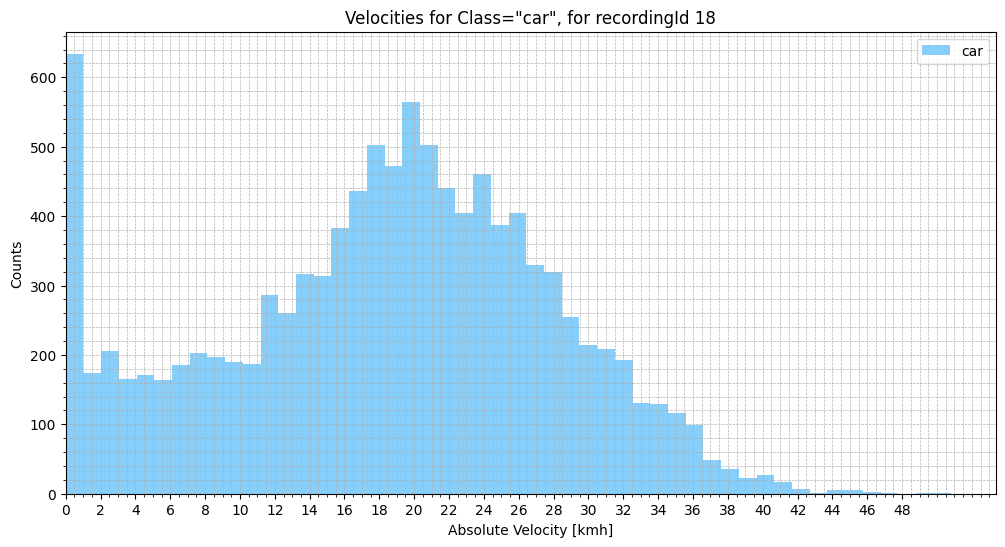

max. velocity in recordingId 18:  50.82187527128341 [km/h]
Bin width: 1.0164245254410766


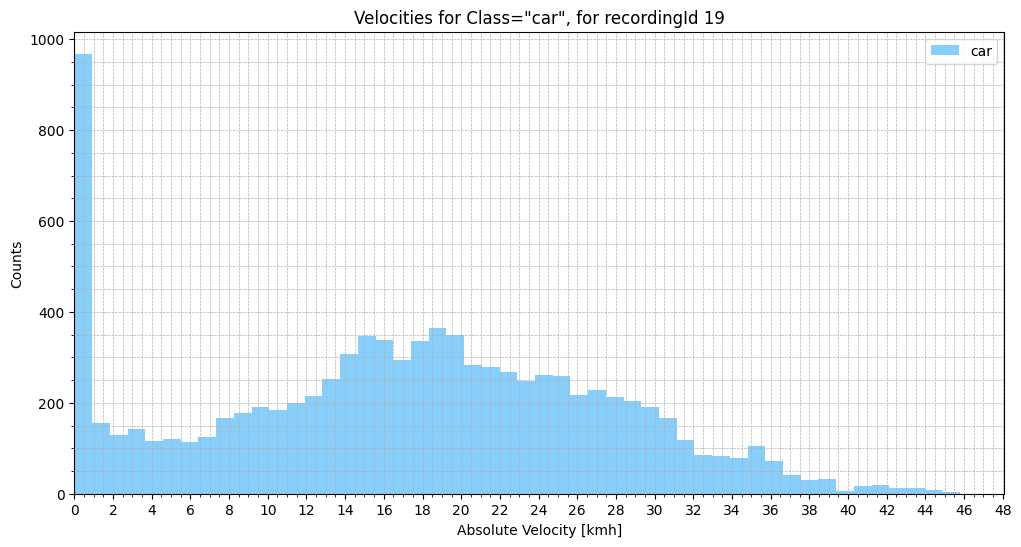

max. velocity in recordingId 19:  45.799780582273534 [km/h]
Bin width: 0.915968652476344


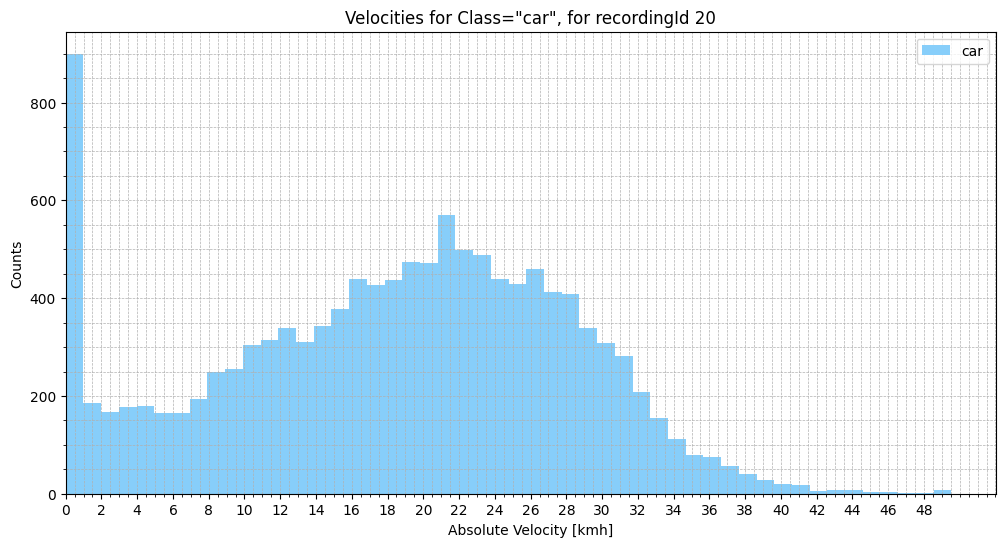

max. velocity in recordingId 20:  49.532022373879954 [km/h]
Bin width: 0.9906157986480123


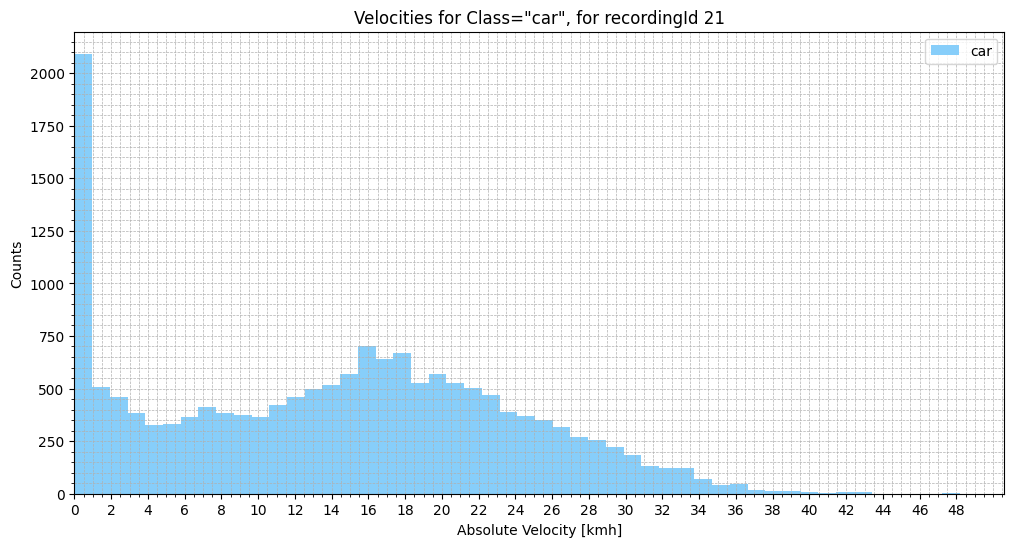

max. velocity in recordingId 21:  48.20107456037054 [km/h]
Bin width: 0.9640087327749053


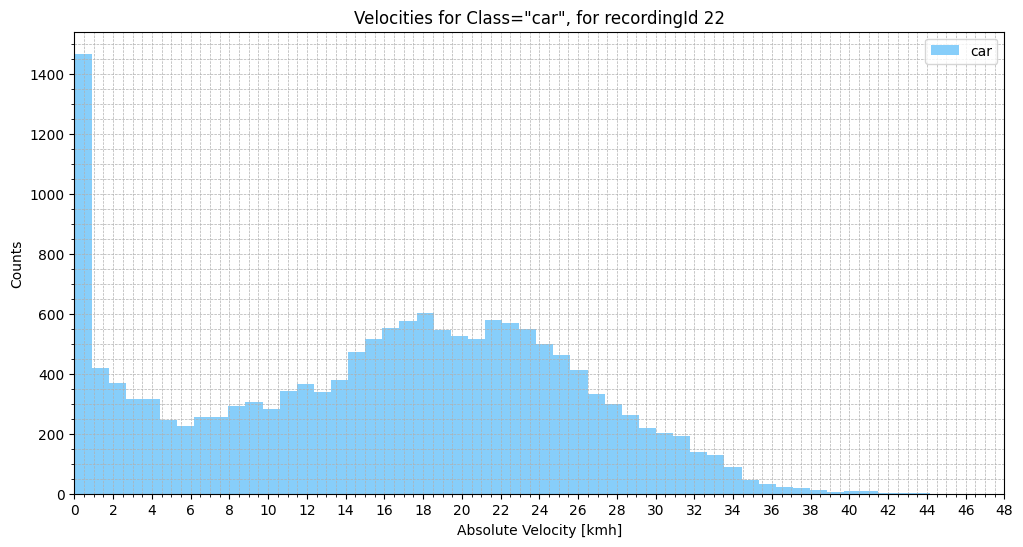

max. velocity in recordingId 22:  44.14288420037911 [km/h]
Bin width: 0.8828499293702599


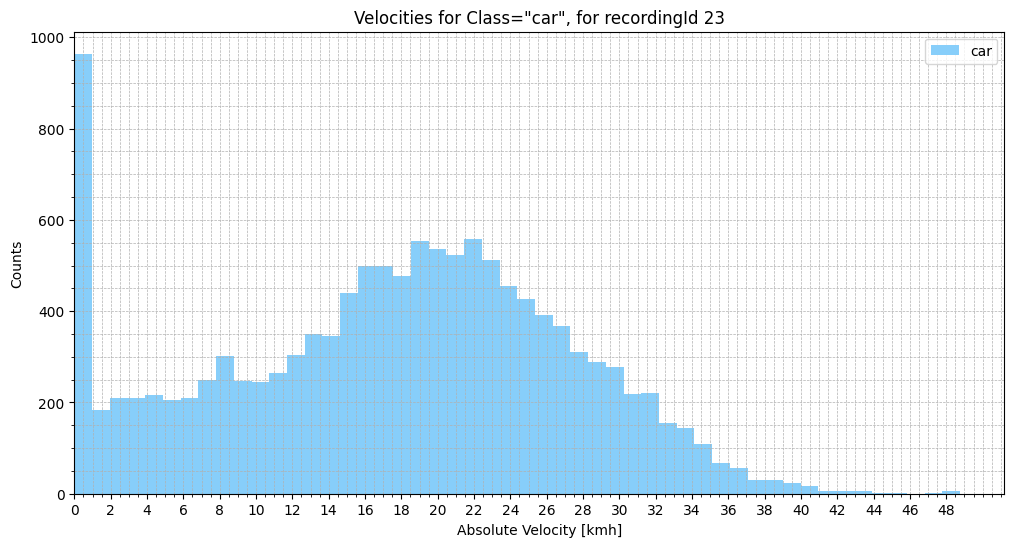

max. velocity in recordingId 23:  48.76030721667713 [km/h]
Bin width: 0.9752017647445207


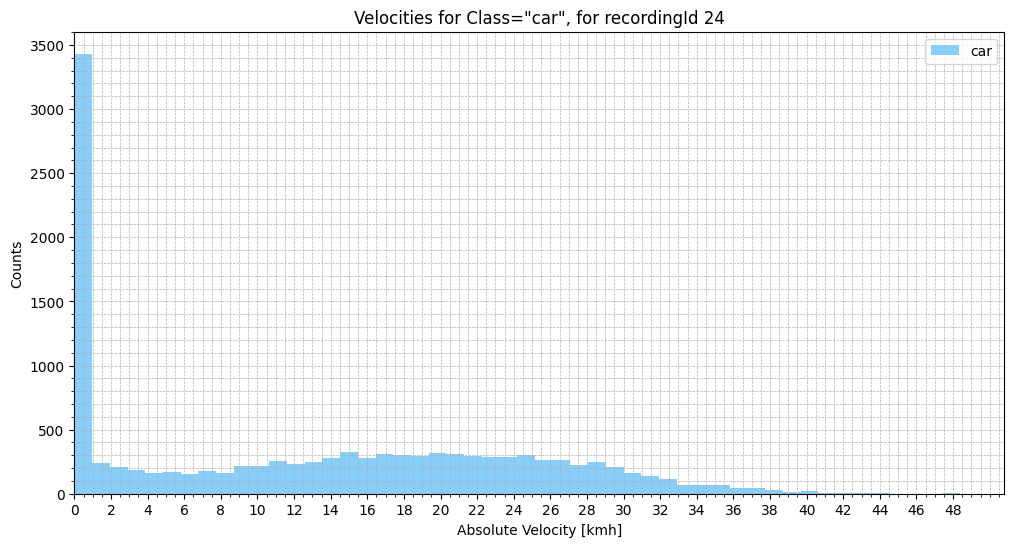

max. velocity in recordingId 24:  48.38389876249677 [km/h]
Bin width: 0.9676763652809917


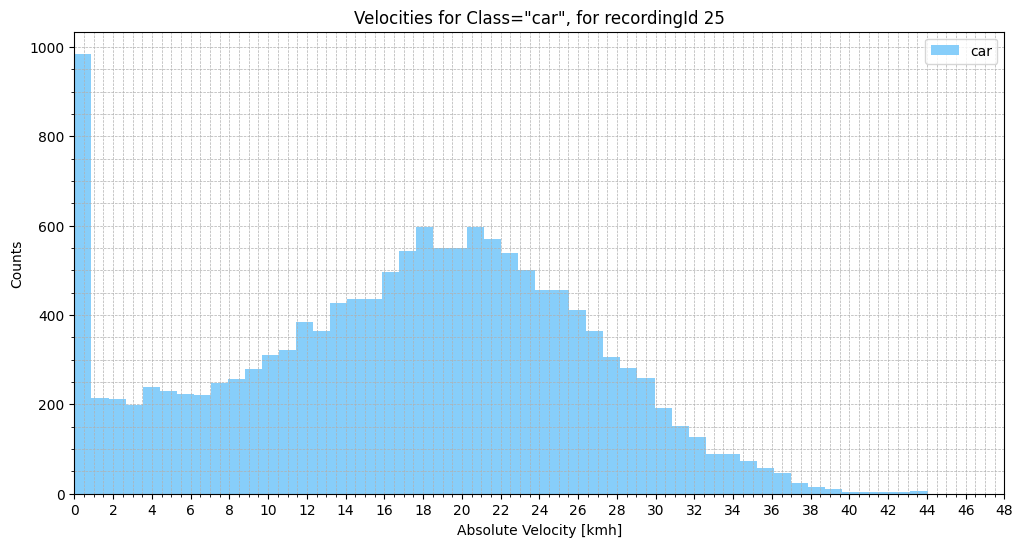

max. velocity in recordingId 25:  44.031679915453594 [km/h]
Bin width: 0.880603521607125


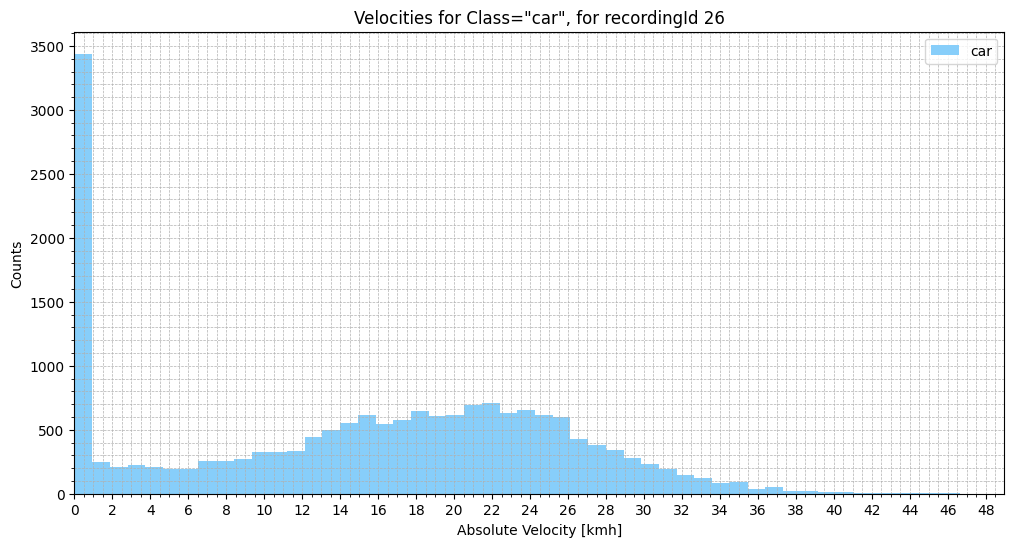

max. velocity in recordingId 26:  46.65022900143252 [km/h]
Bin width: 0.9330035617948854


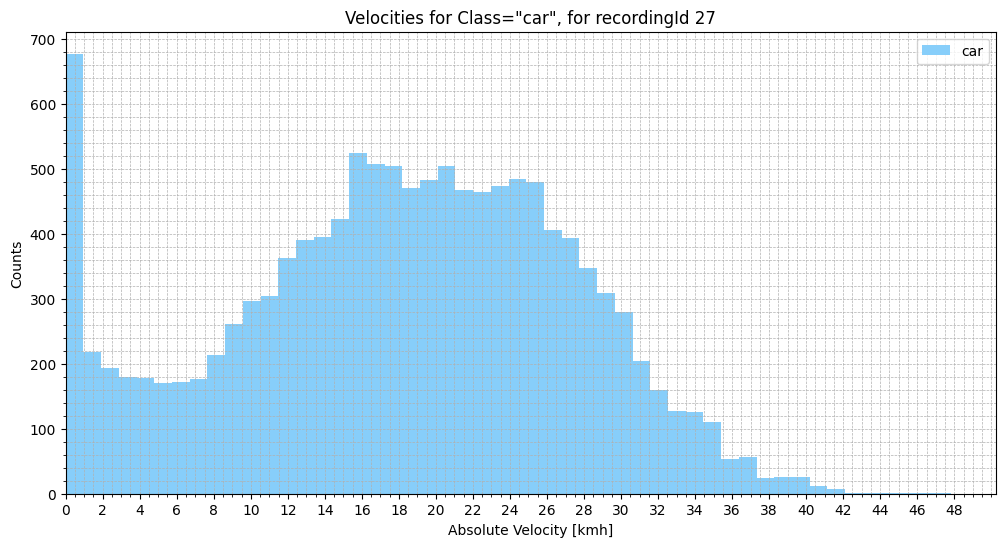

max. velocity in recordingId 27:  47.84212222055455 [km/h]
Bin width: 0.9568141528999966


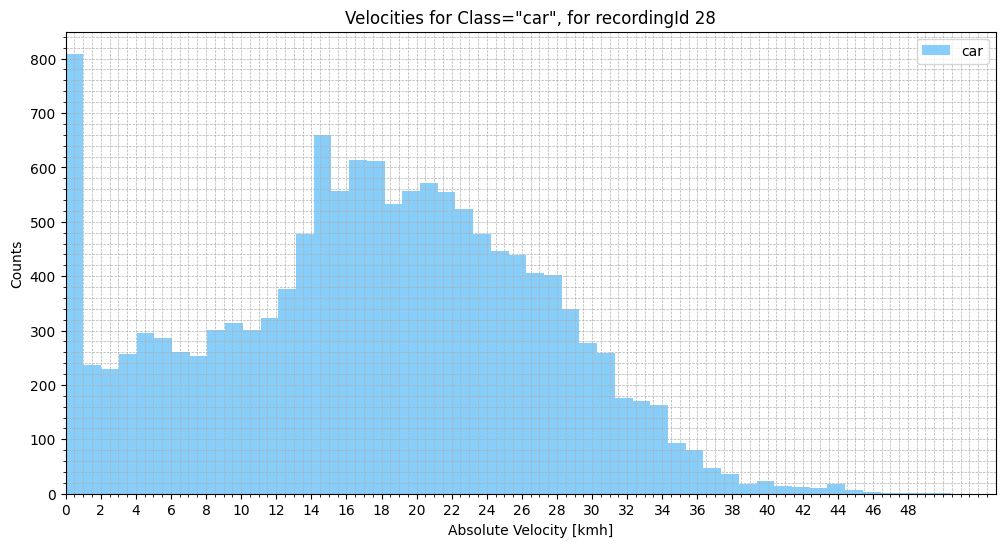

max. velocity in recordingId 28:  50.47530280597909 [km/h]
Bin width: 1.0094800363117424


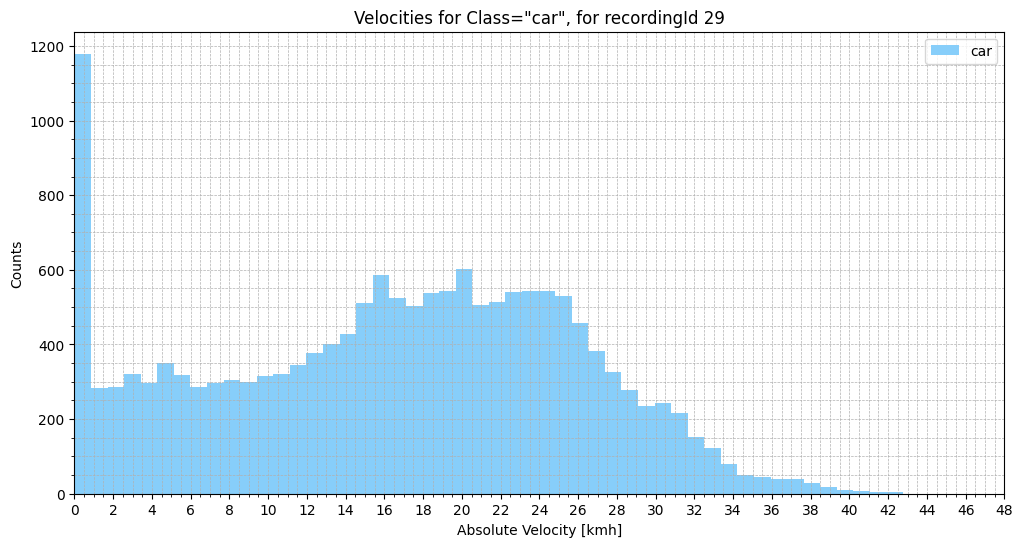

max. velocity in recordingId 29:  42.77681935687505 [km/h]
Bin width: 0.8555287334325159


In [13]:
# desired_class_to_plot = ['car', 'truck_bus']

def print_histogram_of_velocity(dfs_filtered, desired_class_to_plot, color_input):
    
    for i in range(len(dfs_filtered)):      # load all recordings
        df_temp = dfs_filtered[i]
        plot_title = 'recordingId ' + str(df_temp['recordingId'].iloc[0])  # add the recordingId
        # filter by class
        filtered_df_temp = df_temp[df_temp['class'] == desired_class_to_plot]
        # calculate absolute velocity
        filtered_df_temp['abs_velocity']=0
        filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)
        # print figures
        plt.figure(i, figsize=(12,6))
        bins=50
        filtered_df_temp['abs_velocity'].hist(bins=bins, color=color_input)
        plt.title(f'Velocities for Class="{desired_class_to_plot}", for {plot_title}')
        plt.xlabel('Absolute Velocity [kmh]')
        plt.ylabel('Counts')
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.legend([desired_class_to_plot], loc='upper right')
        plt.minorticks_on()
        plt.xlim(left=0)
        plt.xticks(np.arange(0, 50, 2))
        plt.show()
        # check what was the maximum velocity and bins width
        min_velocity = filtered_df_temp['abs_velocity'].min()
        max_velocity = filtered_df_temp['abs_velocity'].max()
        print(f'max. velocity in {plot_title}:  {max_velocity} [km/h]')
        bin_width = (max_velocity - min_velocity) / bins
        print(f"Bin width: {bin_width}")
    return
print_histogram_of_velocity(dfs_filtered, 'car', "lightskyblue")
# print_histogram_of_velocity(dfs_filtered, 'pedestrian', "lightgreen")

Velocitis in range <1 represents cars that stopped. for example to give other cars to pass
.

### Add Gaussian distribution for the cars histograms

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2175605197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


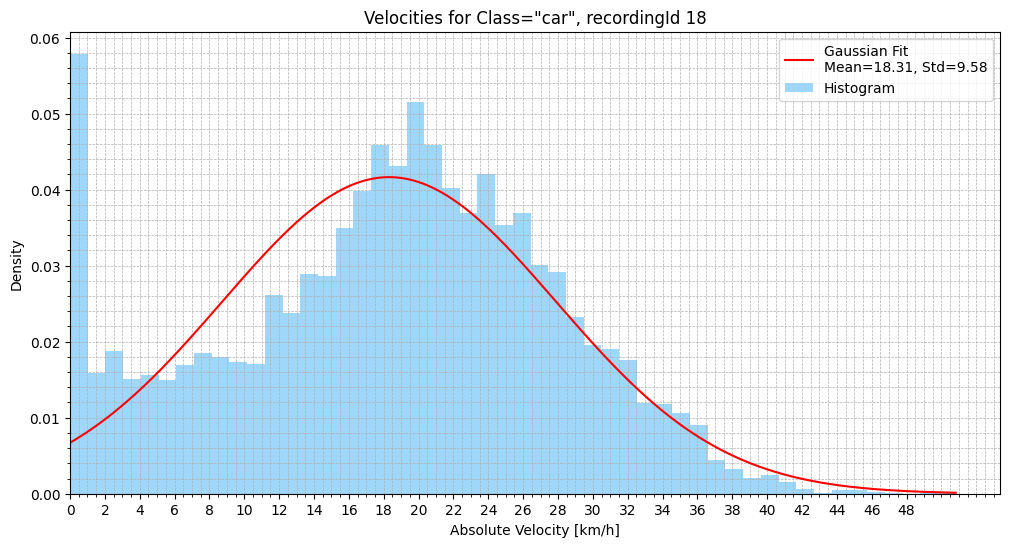

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2175605197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


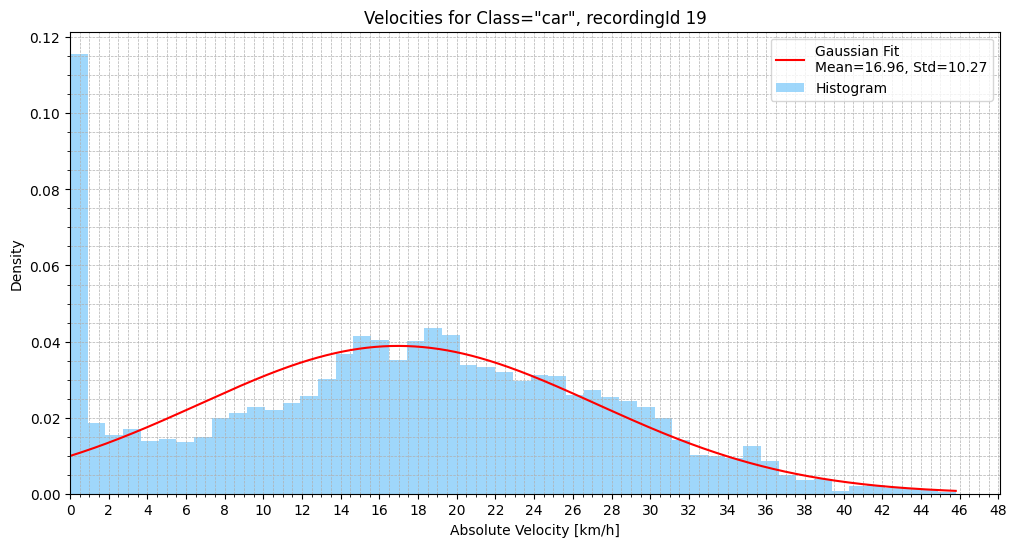

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2175605197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


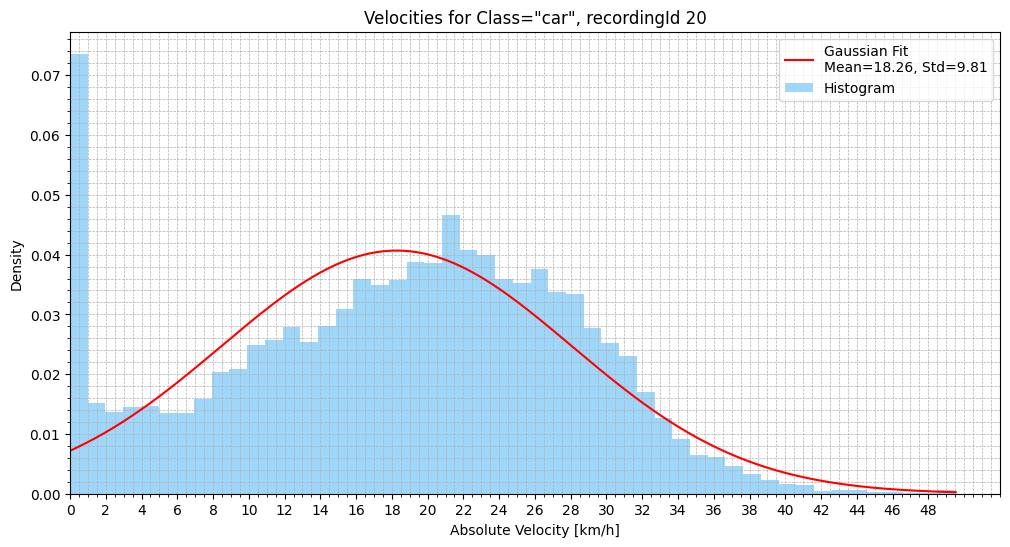

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2175605197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


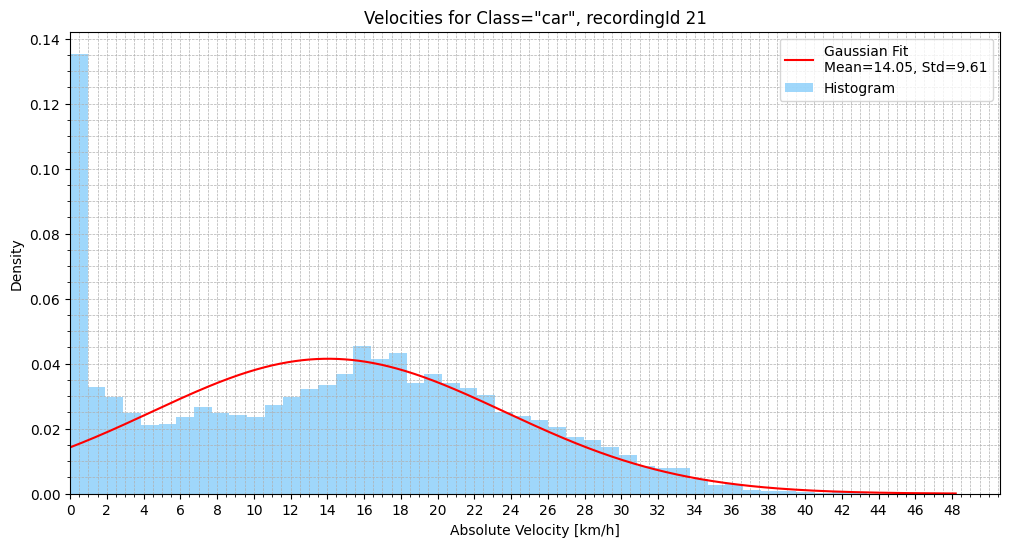

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2175605197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


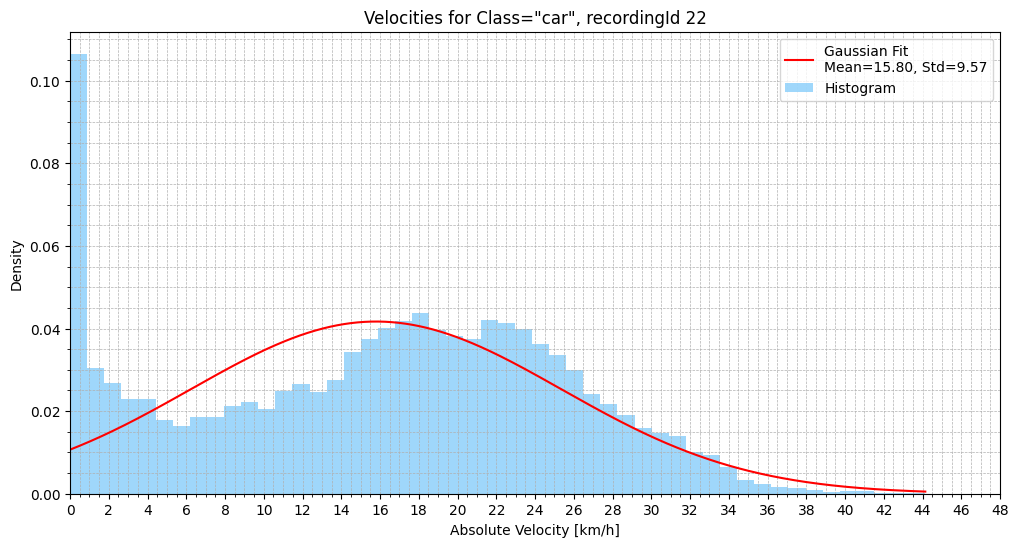

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2175605197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


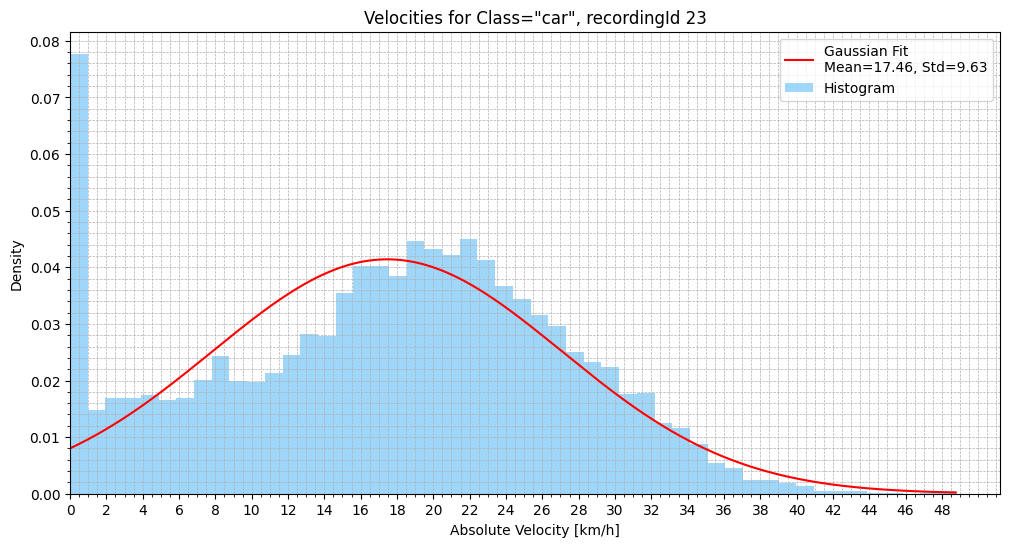

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2175605197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


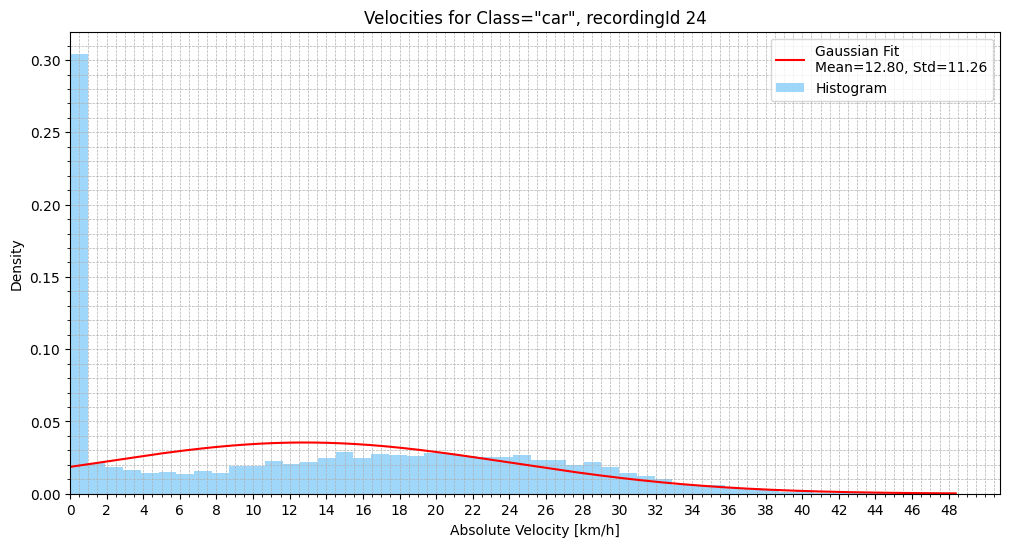

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2175605197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


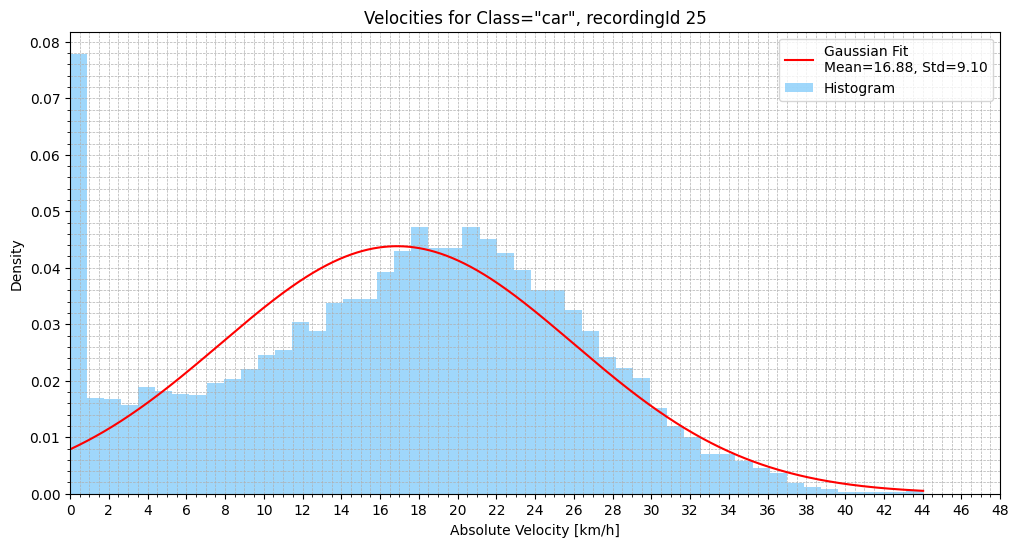

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2175605197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


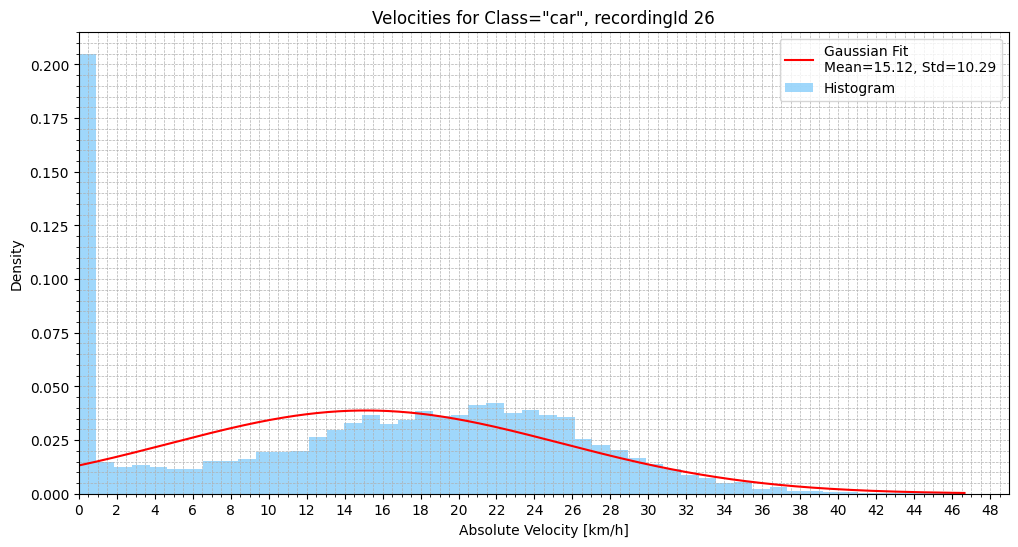

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2175605197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


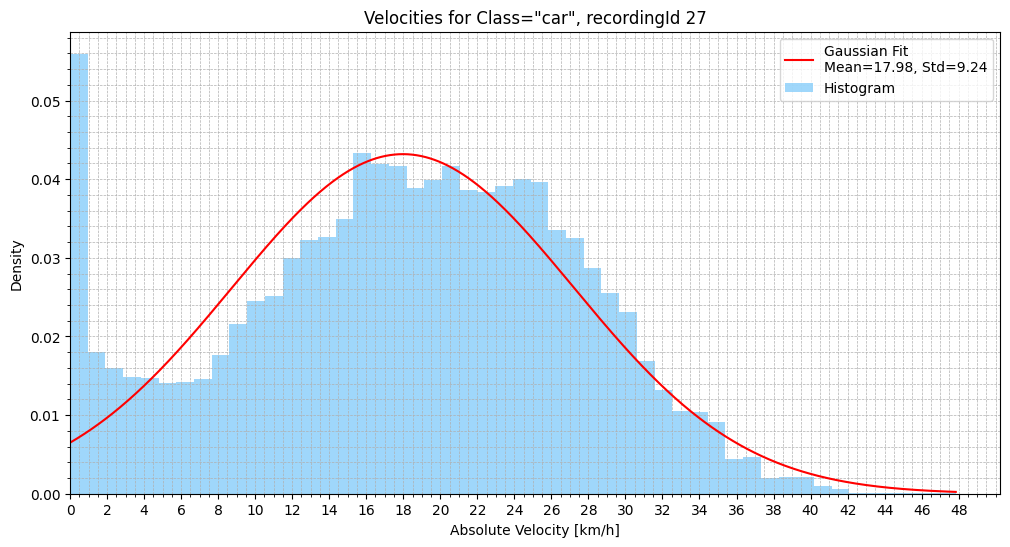

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2175605197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


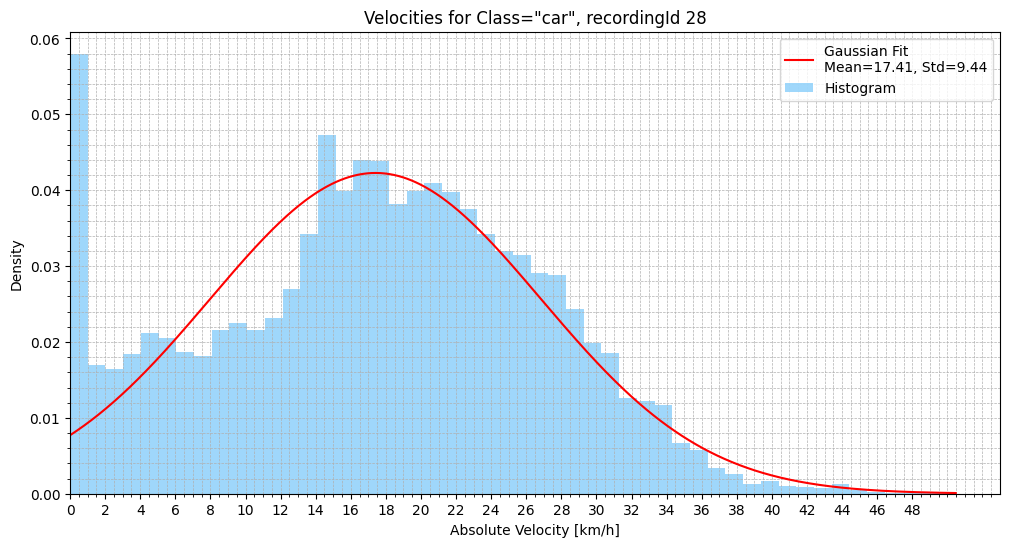

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2175605197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


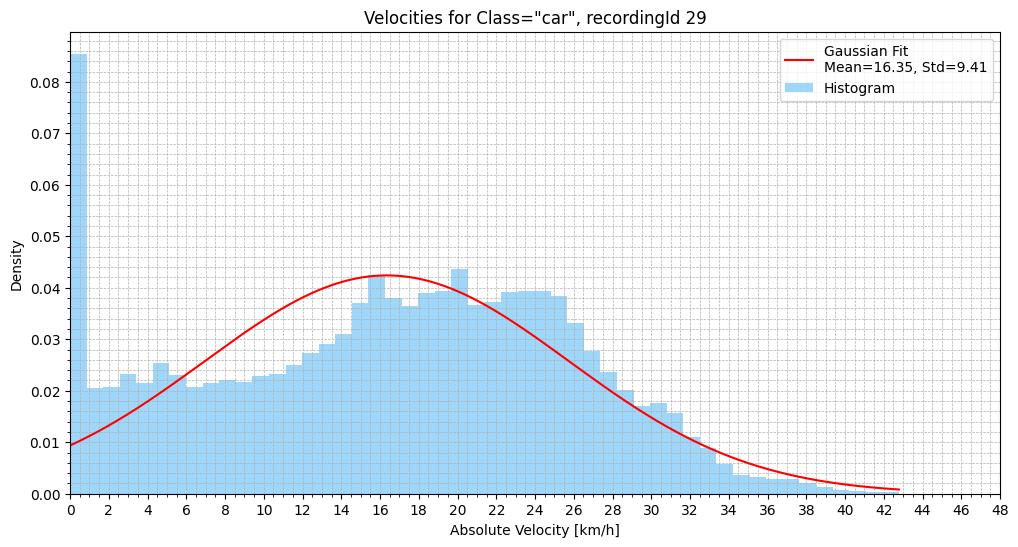

In [14]:
def print_histogram_with_gaussian(dfs_filtered, desired_class_to_plot, color_input):
    for i in range(len(dfs_filtered)):  # Load all recordings
        df_temp = dfs_filtered[i]
        plot_title = 'recordingId ' + str(df_temp['recordingId'].iloc[0])  # Add the recordingId
        # Filter by class
        filtered_df_temp = df_temp[df_temp['class'] == desired_class_to_plot]
        # Calculate absolute velocity
        filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)
        
        # Plot histogram
        plt.figure(i, figsize=(12, 6))
        bins = 50
        data = filtered_df_temp['abs_velocity']
        plt.hist(data, bins=bins, color=color_input, alpha=0.8, density=True, label='Histogram')
        
        # Fit a Gaussian curve
        mean, std = norm.fit(data)  # Calculate mean and standard deviation
        x = np.linspace(data.min(), data.max(), 1000)  # Generate x values
        pdf = norm.pdf(x, mean, std)  # Calculate the PDF
        plt.plot(x, pdf, 'r-', label=f'Gaussian Fit\nMean={mean:.2f}, Std={std:.2f}')
        
        # Add labels and grid
        plt.title(f'Velocities for Class="{desired_class_to_plot}", {plot_title}')
        plt.xlabel('Absolute Velocity [km/h]')
        plt.ylabel('Density')
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.legend(loc='upper right')
        plt.minorticks_on()
        plt.xlim(left=0)
        plt.xticks(np.arange(0, 50, 2))
        plt.show()

# Example usage
print_histogram_with_gaussian(dfs_filtered, 'car', "lightskyblue")

### Histograms for the range of between 0 to 1 kmh

investigate the almost zero velocities of cars:

In [15]:
dfs_filtered_less_than_1kmh= []

for i in range(len(dfs_filtered)):      # load all recordings
    print(i)
    df_temp = dfs_filtered[i]
    #add absolute velocity column
    df_temp['abs_velocity']=0
    df_temp['abs_velocity'] = 3.6 * np.sqrt(df_temp['xVelocity']**2 + df_temp['yVelocity']**2)
    dfs_filtered_less_than_1kmh.append(df_temp)    

for i in range(len(dfs_filtered_less_than_1kmh)):
    df_temp = dfs_filtered_less_than_1kmh[i]
    # filter by threshold
    df_temp = df_temp[df_temp['abs_velocity'] < 1]  
    dfs_filtered_less_than_1kmh[i] = df_temp

0
1
2
3
4
5
6
7
8
9
10
11


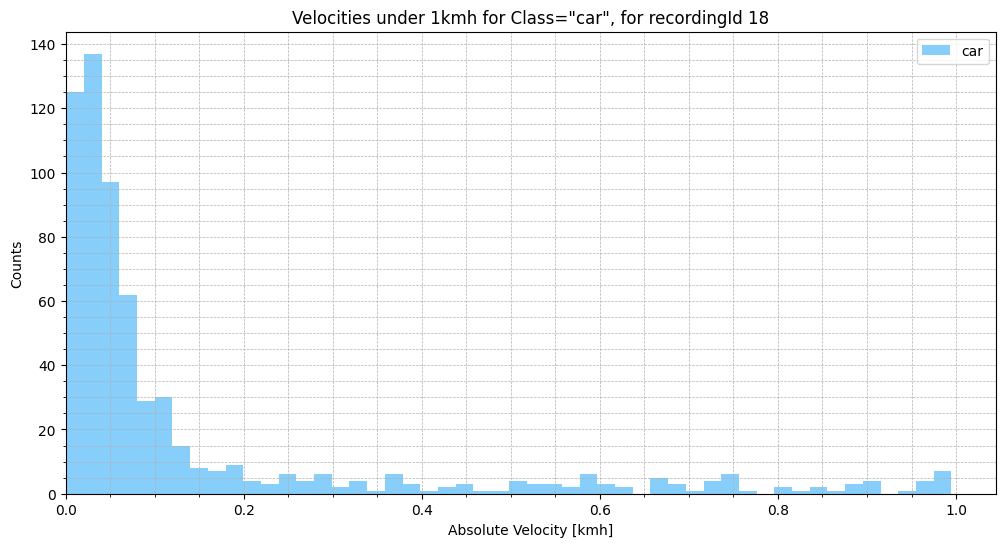

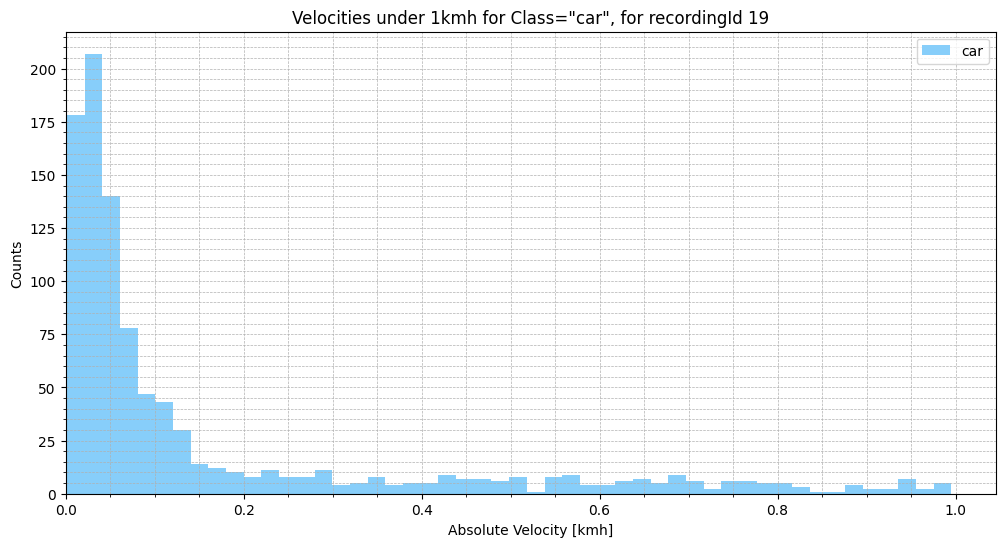

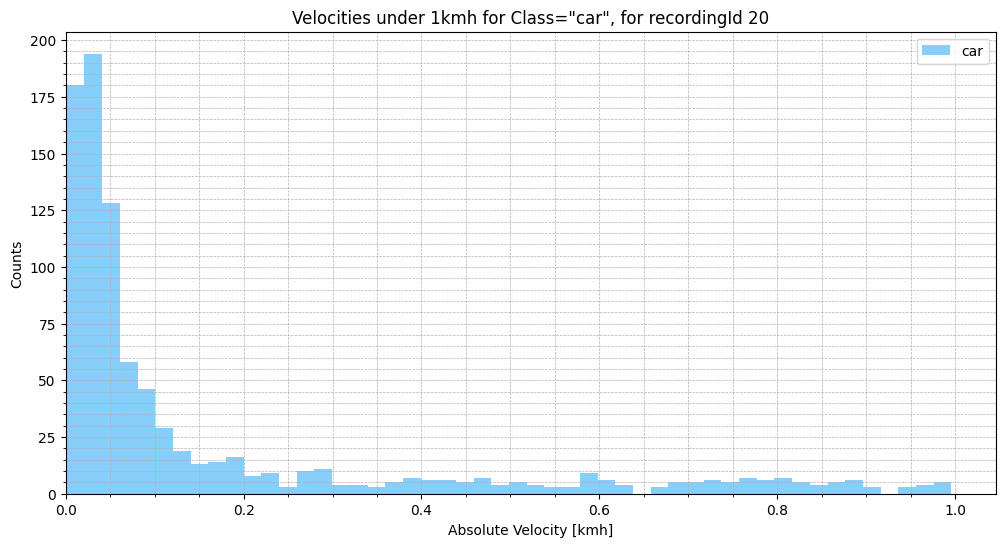

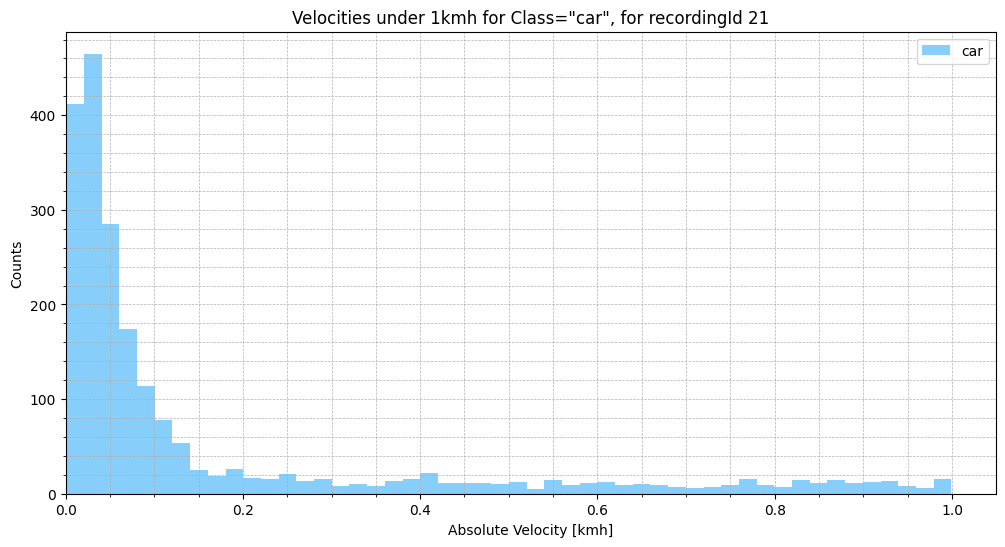

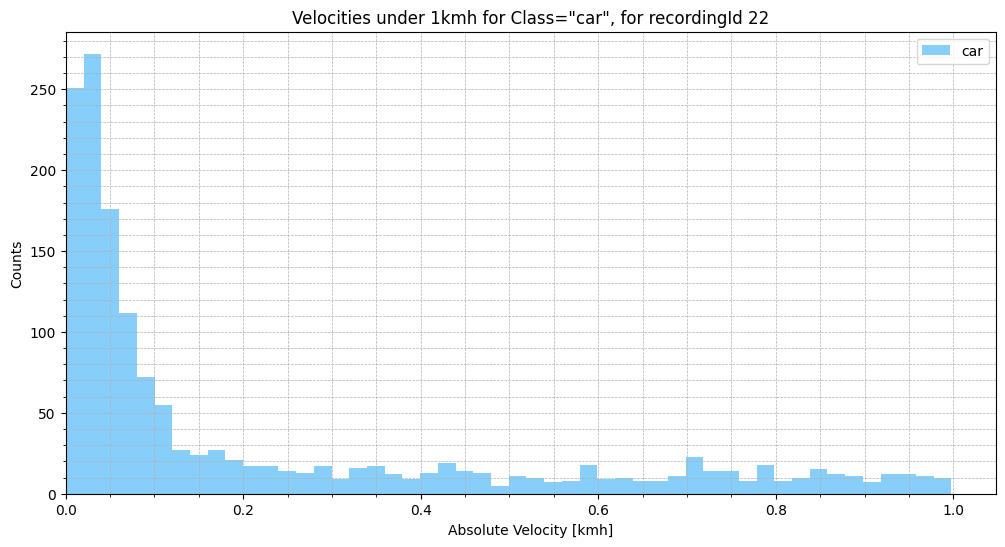

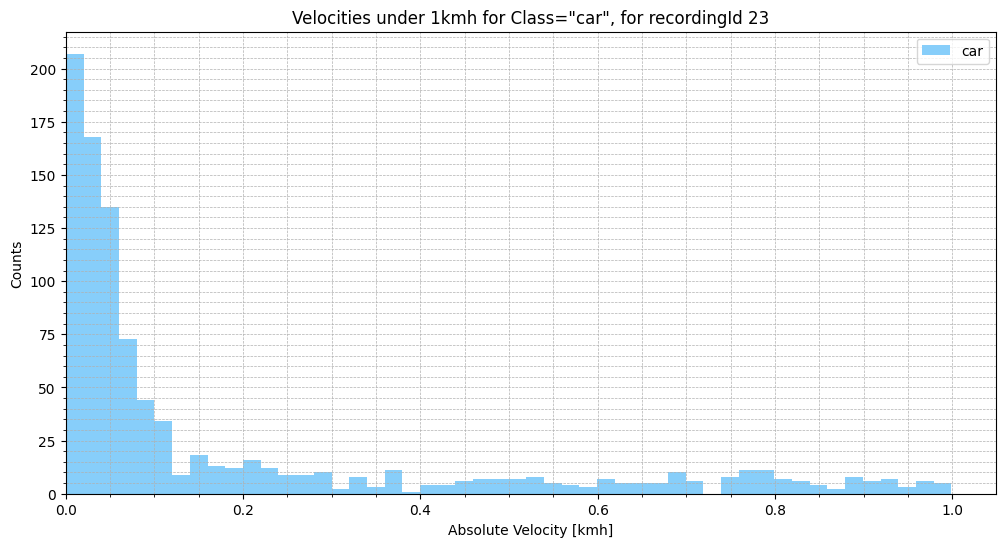

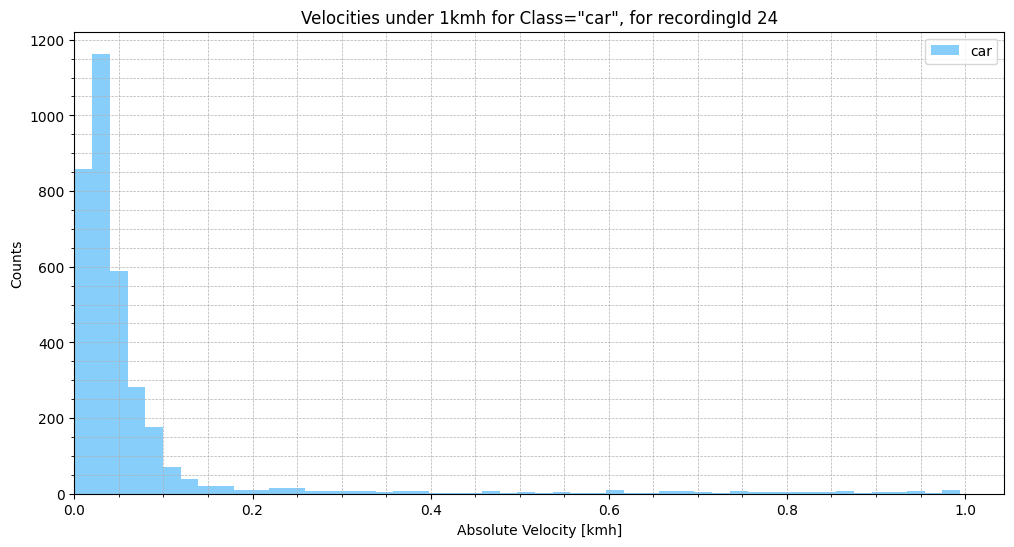

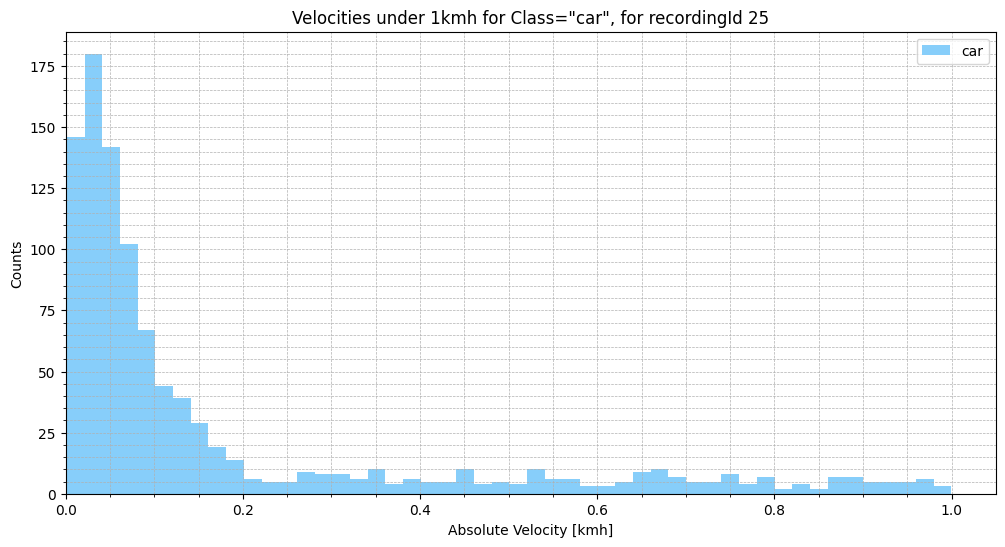

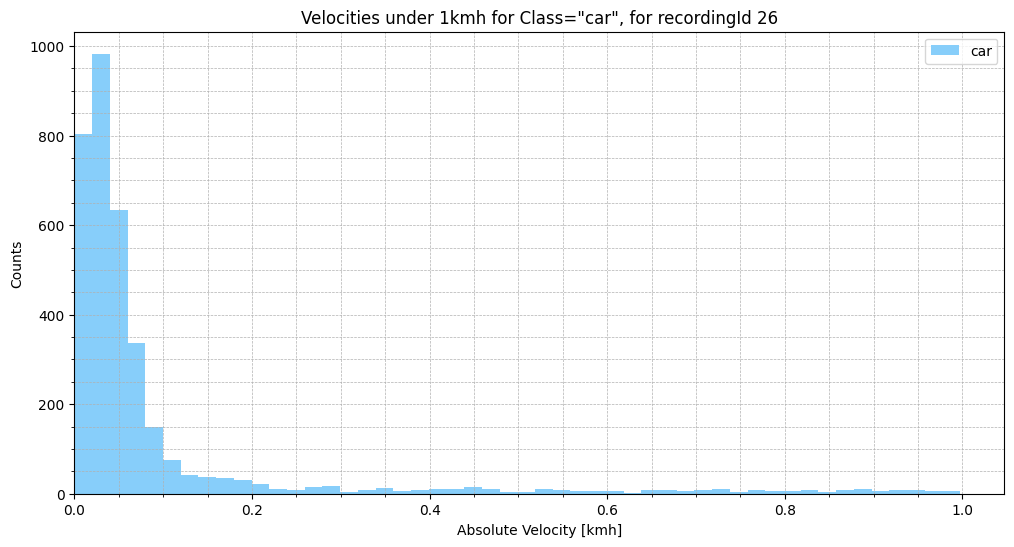

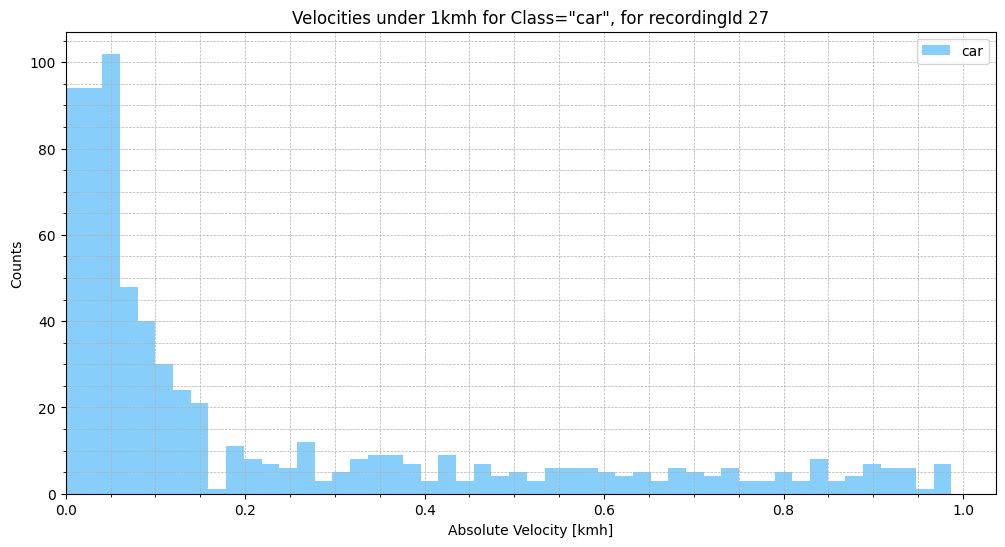

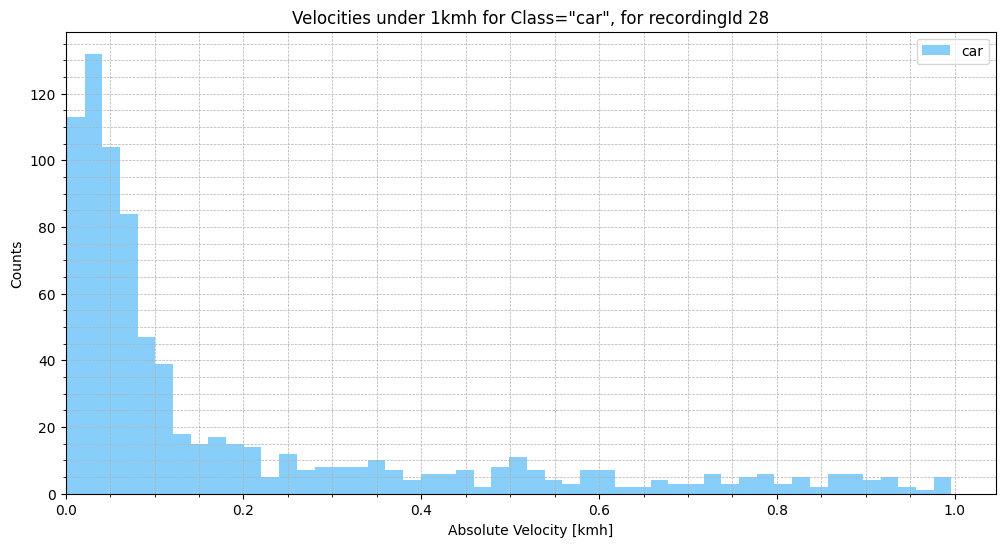

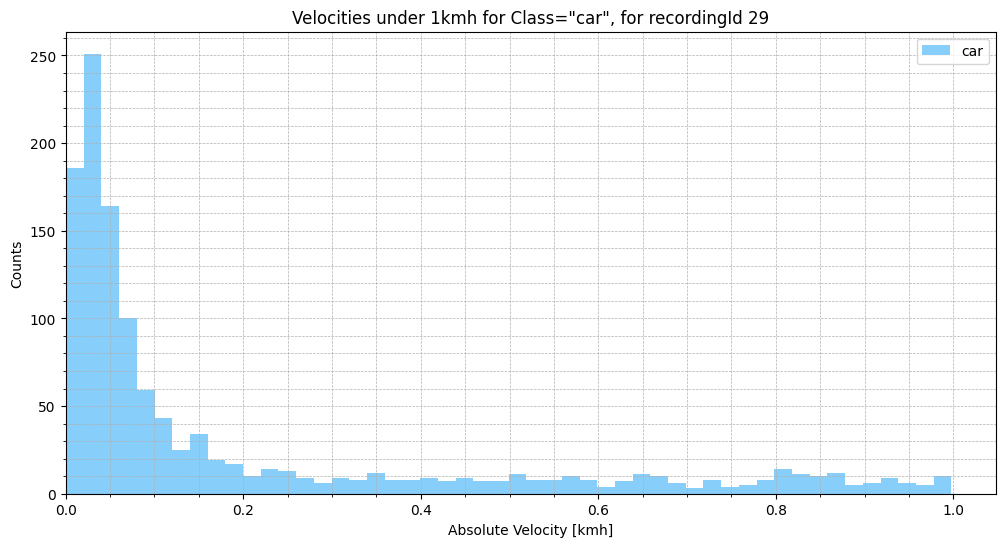

In [16]:
def print_histogram_of_velocity_less_than_1kmh(dfs, desired_class_to_plot, color_input):
    for i in range(len(dfs)):      # load all recordings
        df_temp = dfs[i]
        plot_title = 'recordingId ' + str(df_temp['recordingId'].iloc[0])  # add the recordingId
        # filter by class
        filtered_df_temp = df_temp[df_temp['class'] == desired_class_to_plot]
        # print figures
        plt.figure(i, figsize=(12,6))
        bins=50
        filtered_df_temp['abs_velocity'].hist(bins=bins, color=color_input)
        plt.title(f'Velocities under 1kmh for Class="{desired_class_to_plot}", for {plot_title}')
        plt.xlabel('Absolute Velocity [kmh]')
        plt.ylabel('Counts')
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.legend([desired_class_to_plot], loc='upper right')
        plt.minorticks_on()
        plt.xlim(left=0)
        plt.xticks(np.arange(0, 1.2, 0.2))
        plt.show()
        # check what was the maximum velocity and bins width
        # min_velocity = filtered_df_temp['abs_velocity'].min()
        # max_velocity = filtered_df_temp['abs_velocity'].max()
        # print(f'max. velocity in {plot_title}:  {max_velocity} [km/h]')
        # bin_width = (max_velocity - min_velocity) / bins
        # print(f"Bin width: {bin_width}")
    return
print_histogram_of_velocity_less_than_1kmh(dfs_filtered_less_than_1kmh, 'car', "lightskyblue")

## Pedestrians

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2175605197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


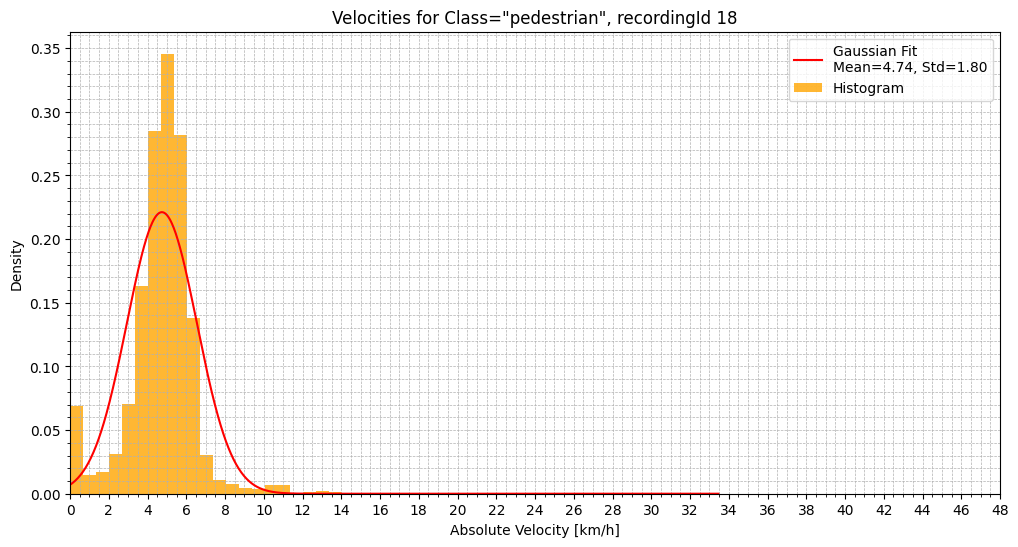

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2175605197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


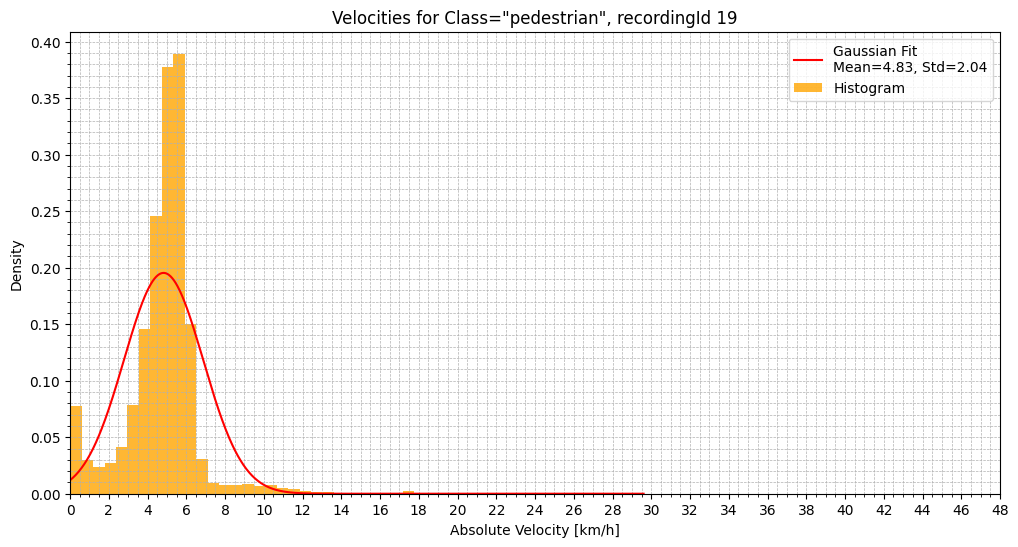

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2175605197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


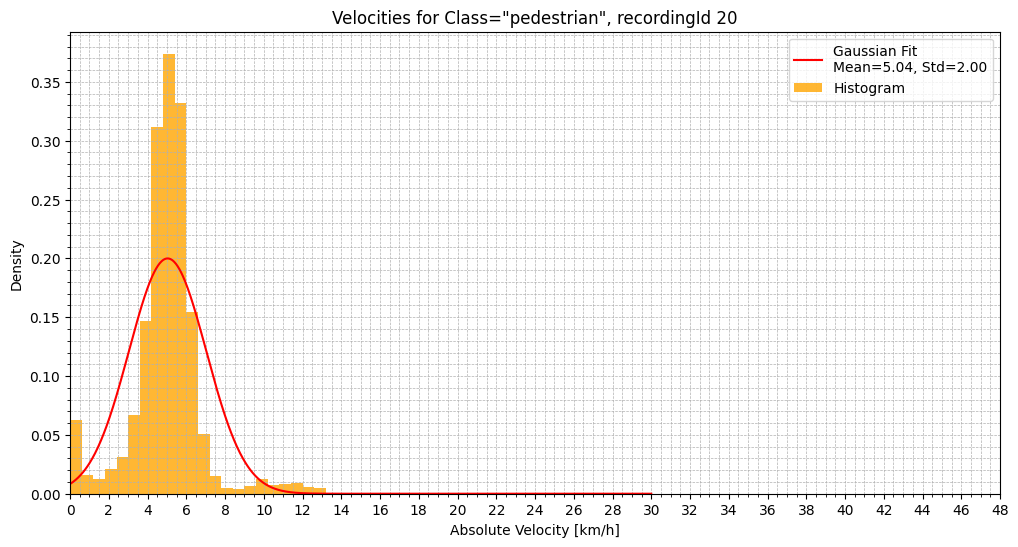

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2175605197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


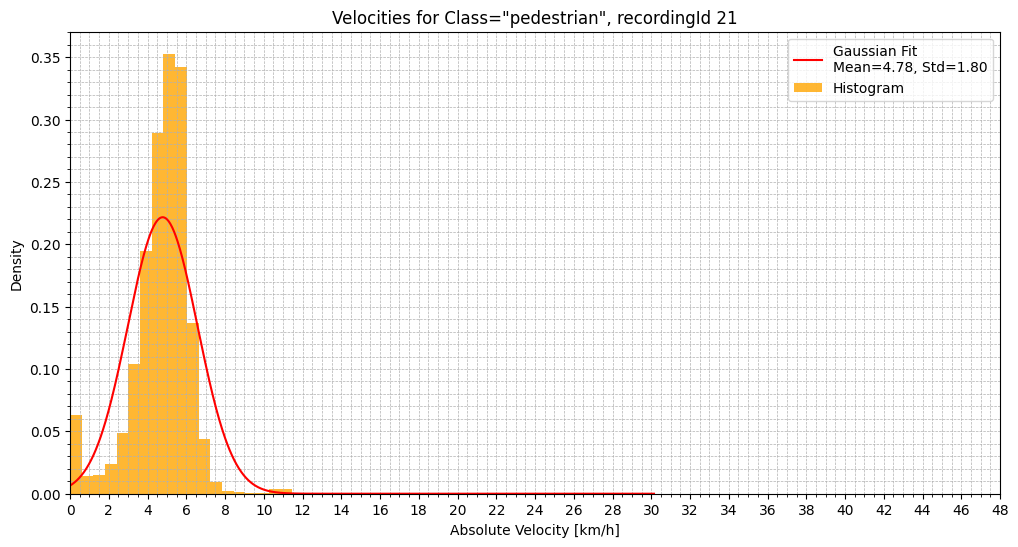

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2175605197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


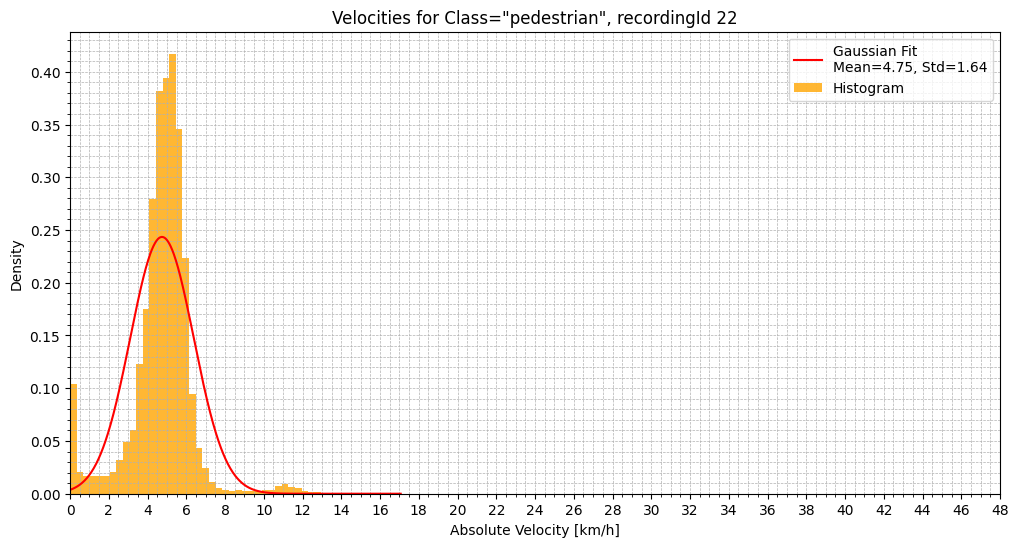

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2175605197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


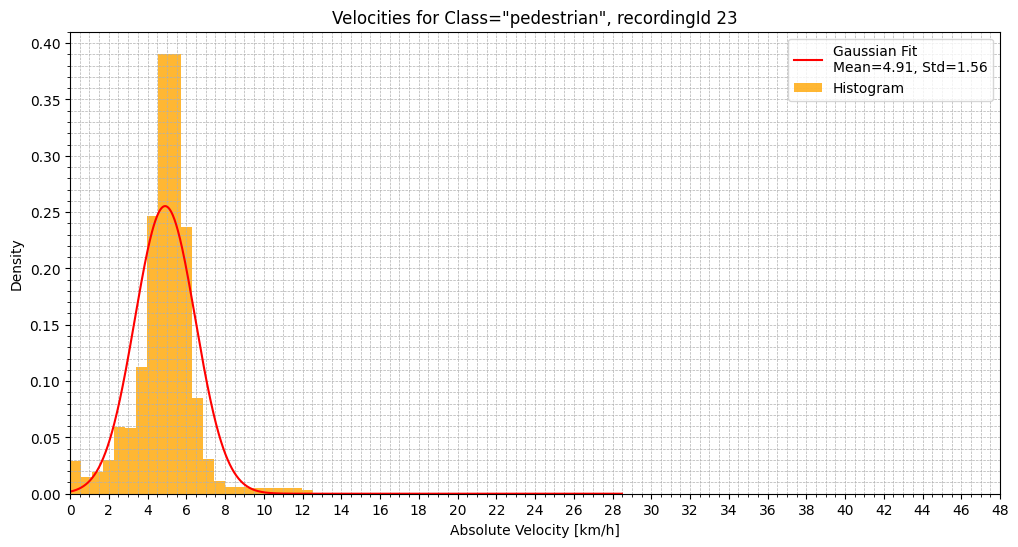

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2175605197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


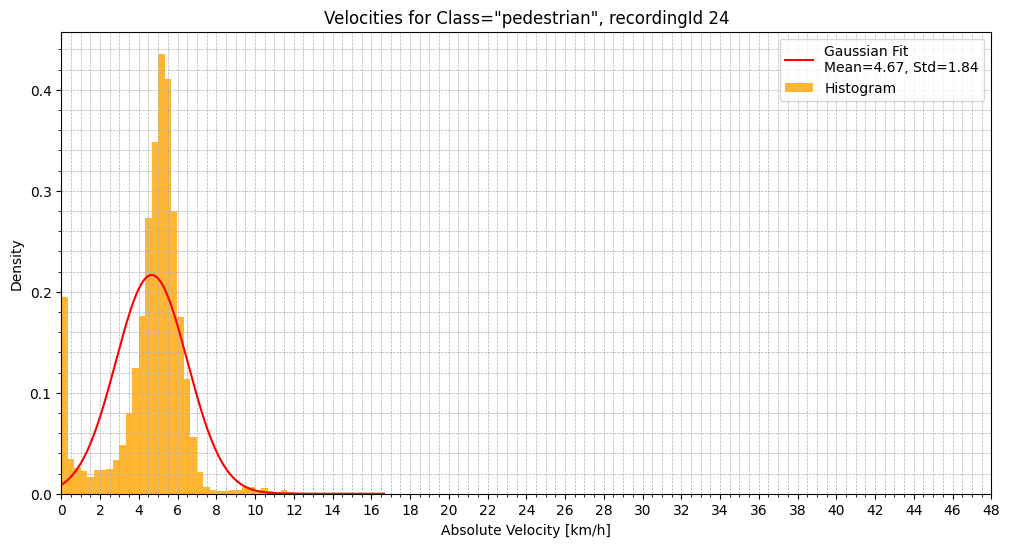

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2175605197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


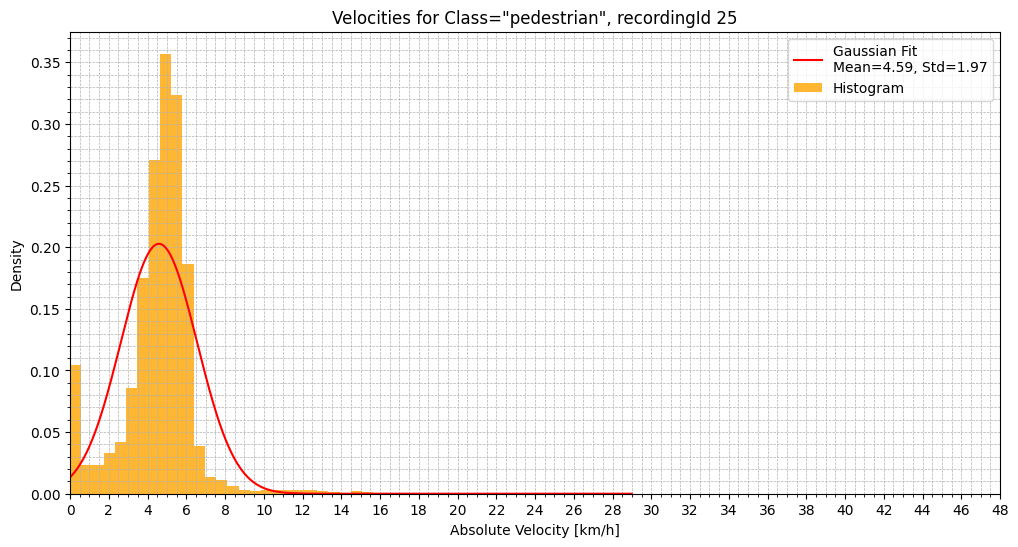

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2175605197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


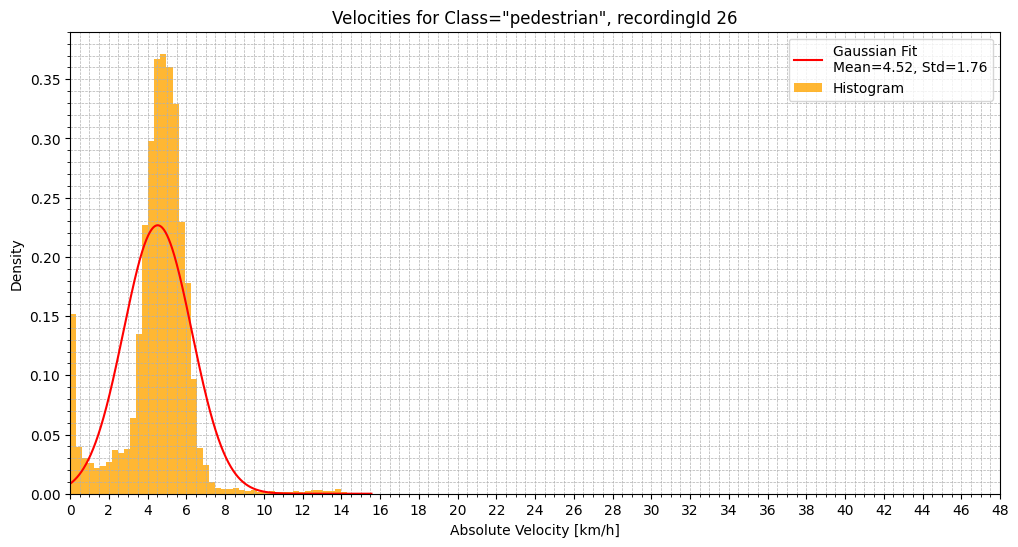

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2175605197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


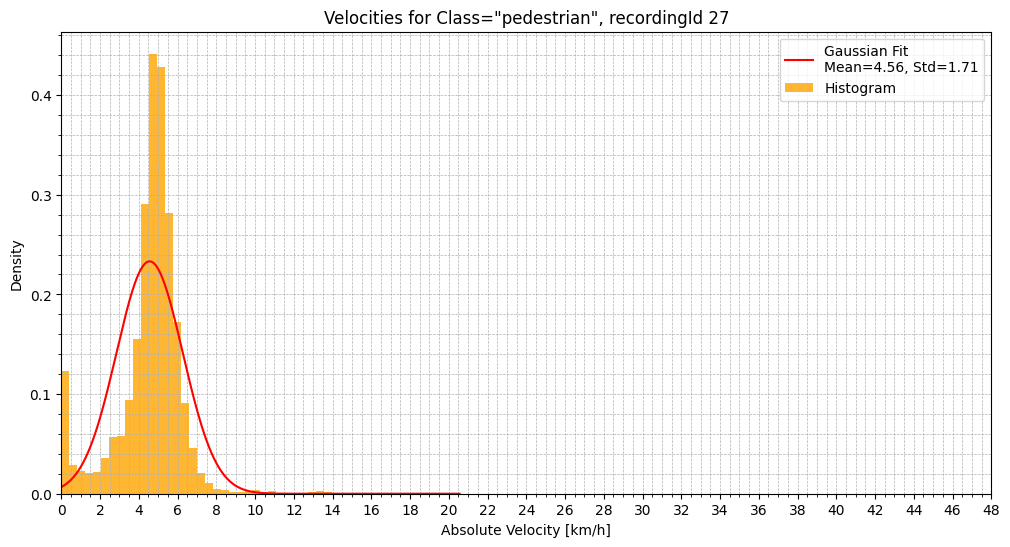

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2175605197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


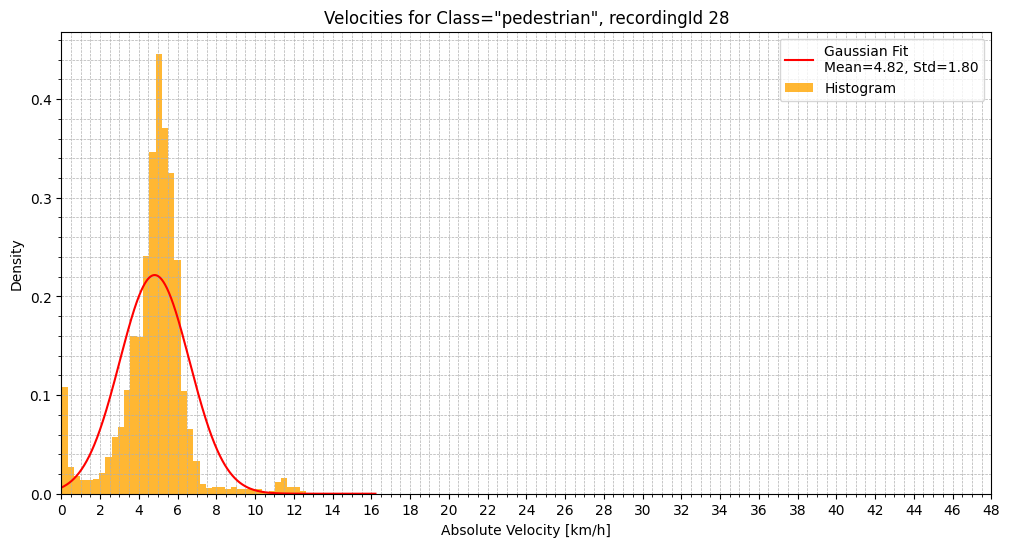

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2175605197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)


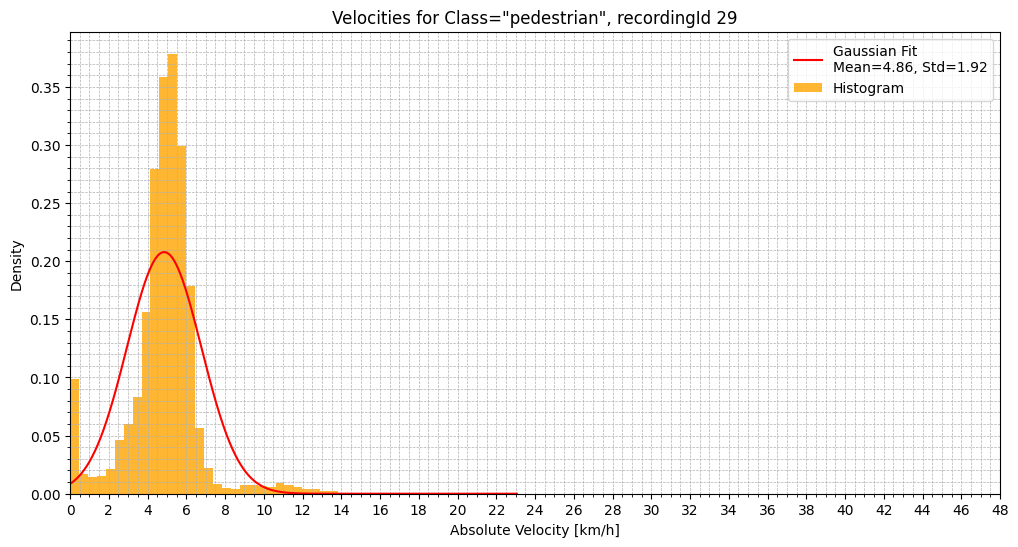

In [17]:
print_histogram_with_gaussian(dfs_filtered, 'pedestrian', "orange")

# Histograms for all labels

All classes

C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2761299055.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)
C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2761299055.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)
C:\Users\yftac\AppData\Local\Temp\ipykernel_3920\2

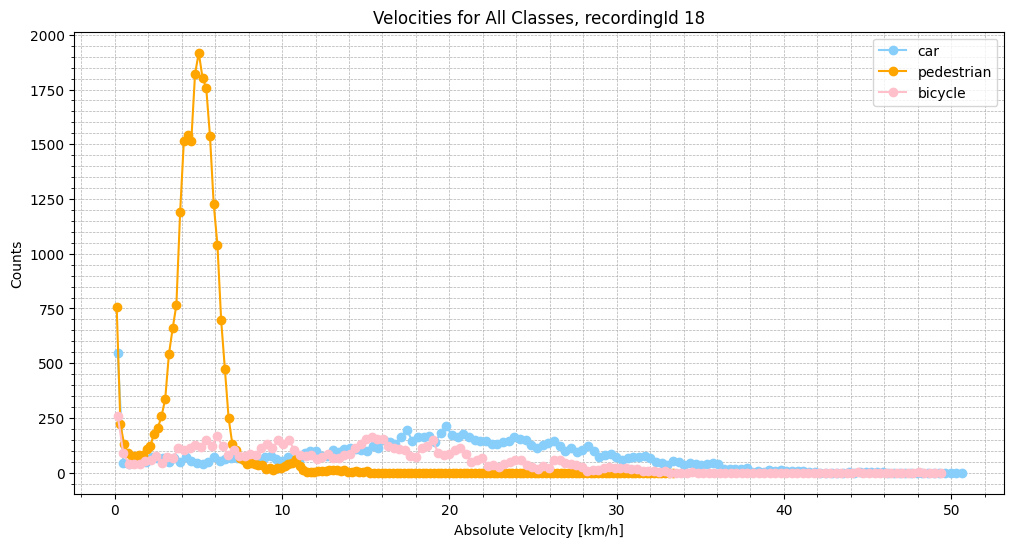

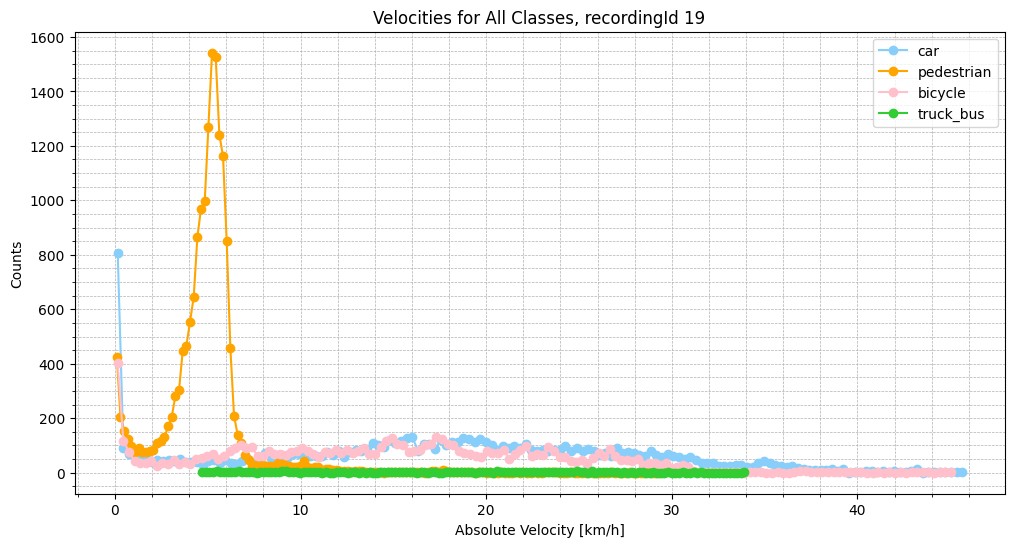

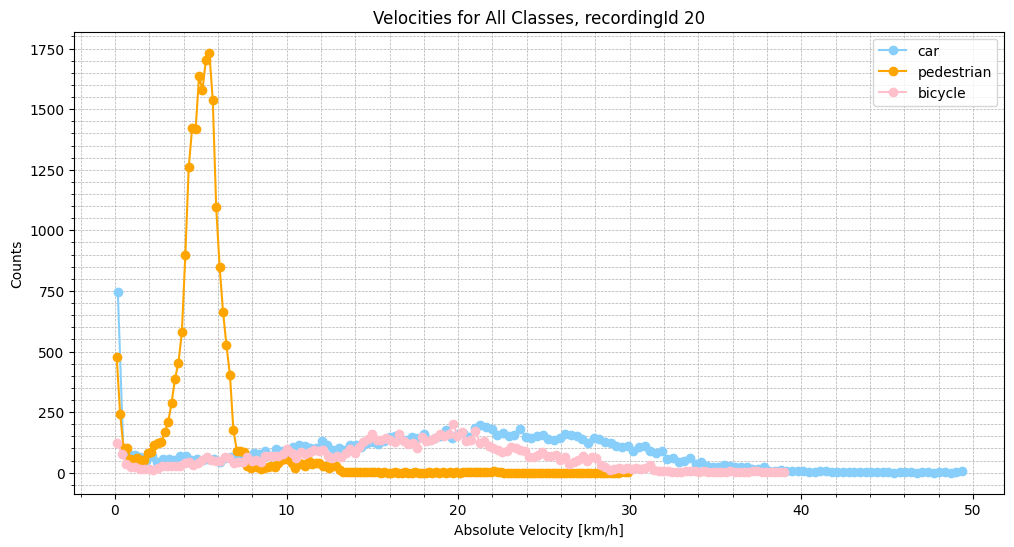

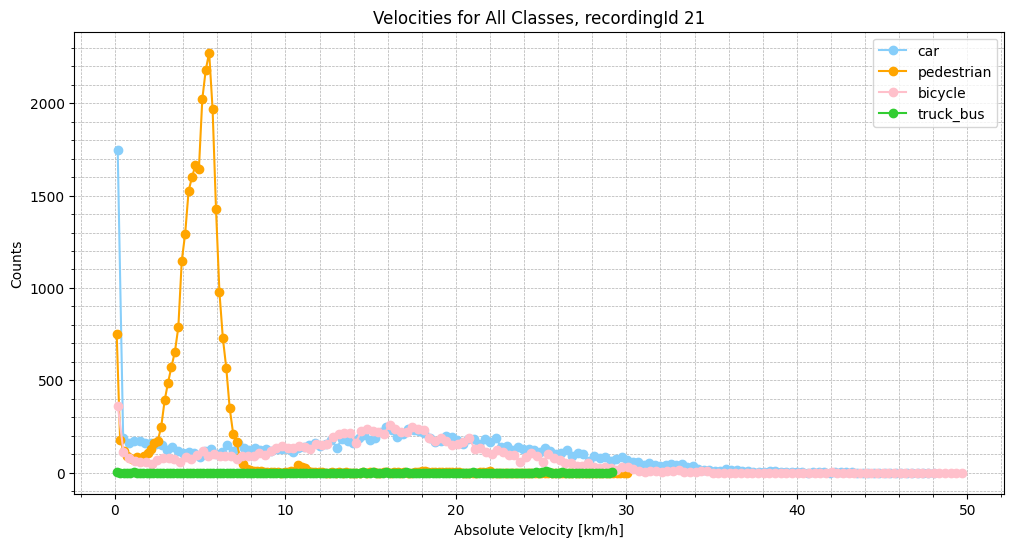

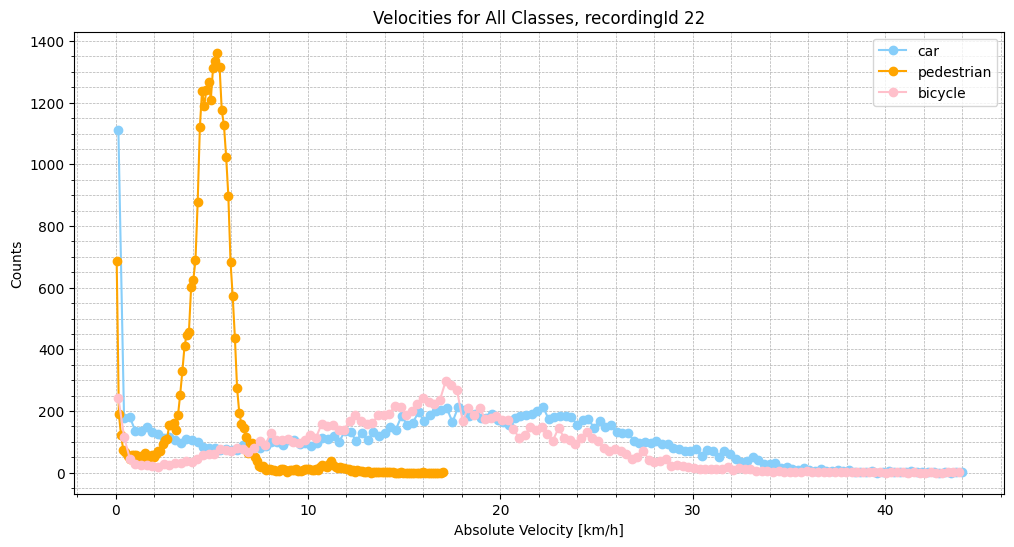

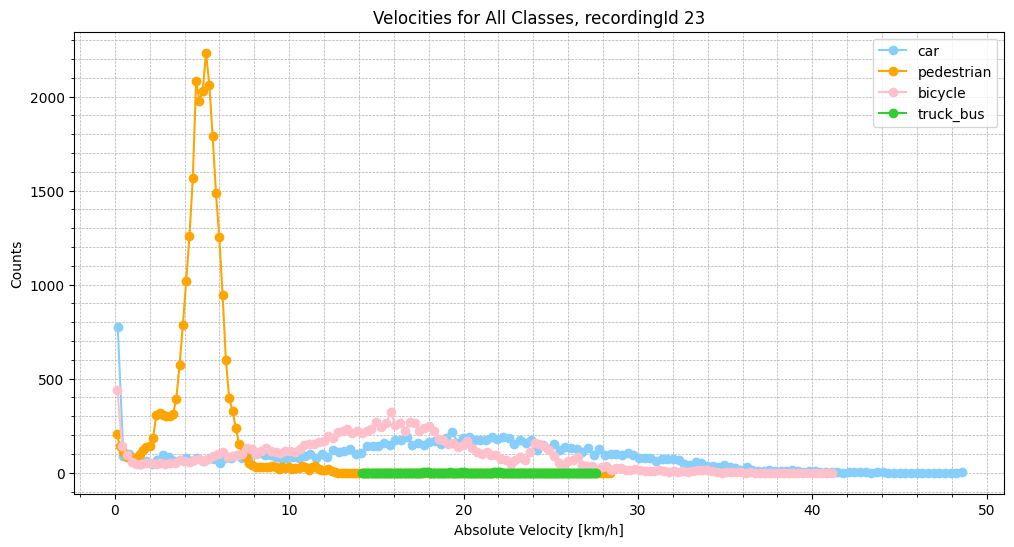

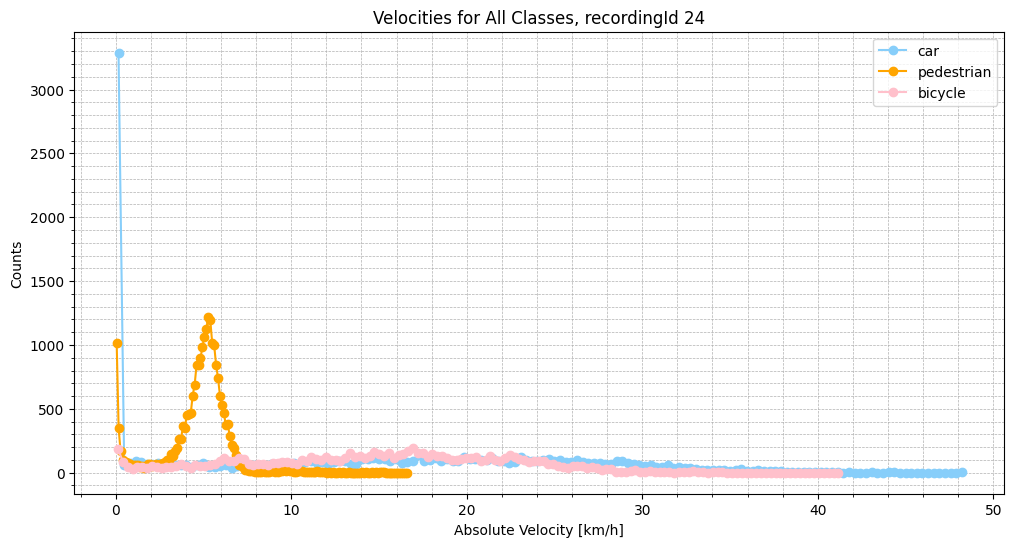

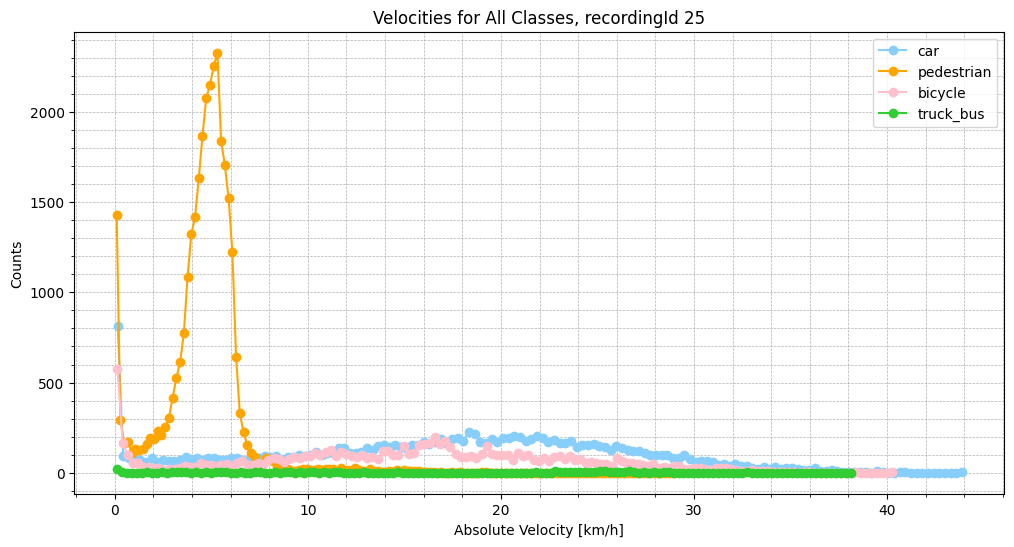

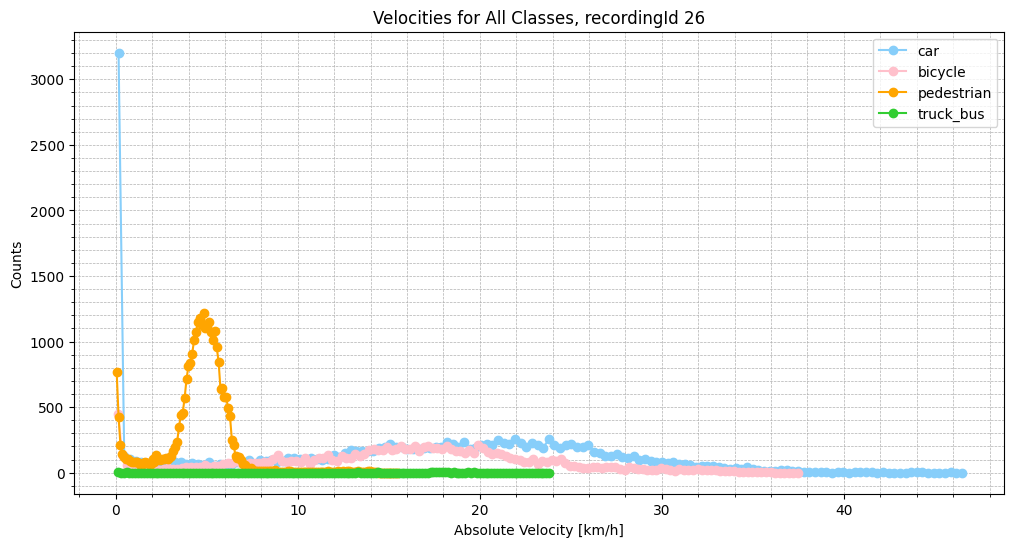

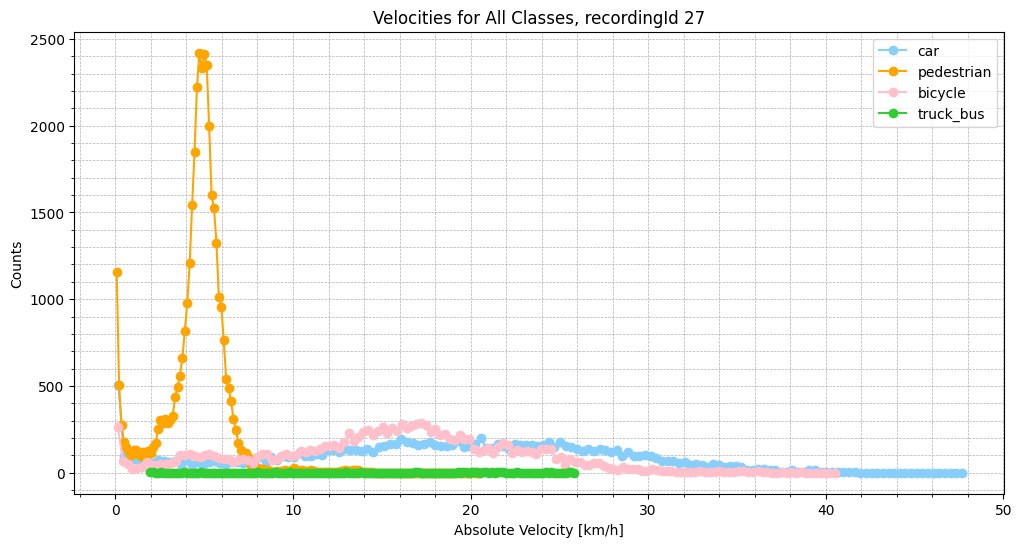

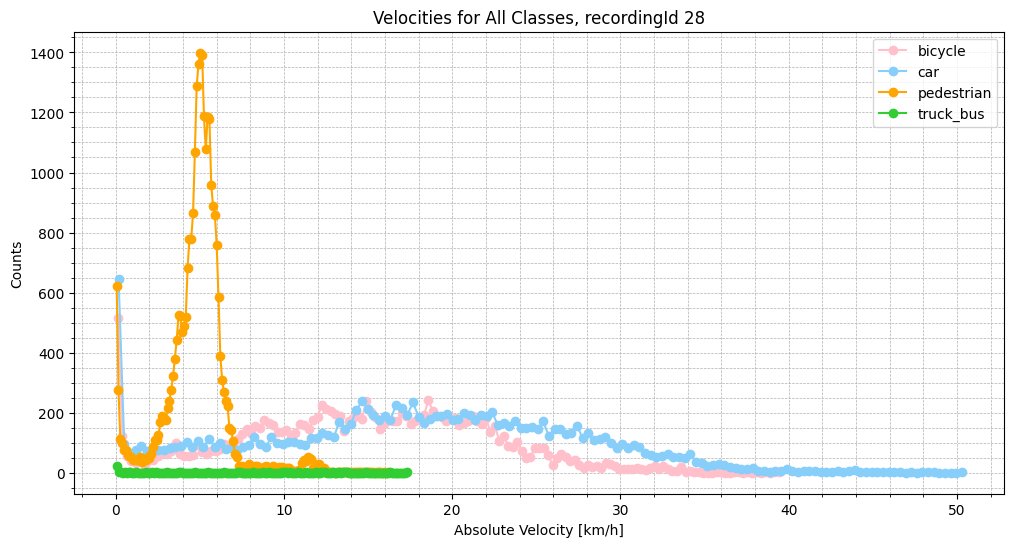

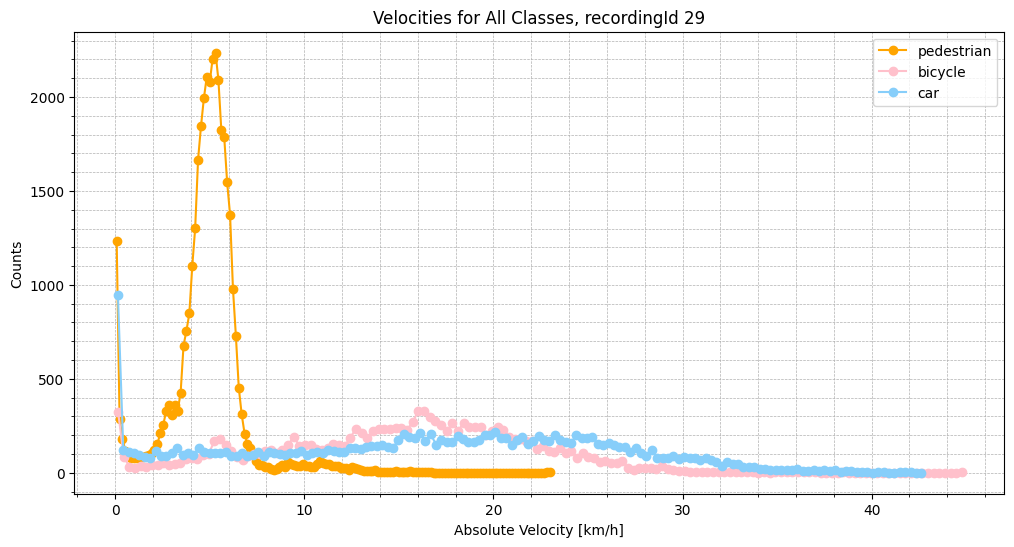

In [18]:
def print_histogram_of_velocity(dfs_filtered, colors):
    for i in range(len(dfs_filtered)):  # load all recordings
        df_temp = dfs_filtered[i]
        plot_title = 'recordingId ' + str(df_temp['recordingId'].iloc[0])  # add the recordingId
        plt.figure(i, figsize=(12, 6))
        
        # Iterate over all unique classes in the DataFrame
        for cls in df_temp['class'].unique():
            # Filter by class
            filtered_df_temp = df_temp[df_temp['class'] == cls]
            # Calculate absolute velocity
            filtered_df_temp['abs_velocity'] = 3.6 * np.sqrt(filtered_df_temp['xVelocity']**2 + filtered_df_temp['yVelocity']**2)
            # Calculate histogram data
            counts, bin_edges = np.histogram(filtered_df_temp['abs_velocity'], bins=150)
            bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
            # Plot histogram as line
            plt.plot(bin_centers, counts, color=colors.get(cls, 'black'), marker='o', linestyle='-', label=f'{cls}')
        
        plt.title(f'Velocities for All Classes, {plot_title}')
        plt.xlabel('Absolute Velocity [km/h]')
        plt.ylabel('Counts')
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.minorticks_on()
        plt.legend()
    
    plt.show()

# Define colors for each class
colors = {
    'car': 'lightskyblue',
    'truck_bus': 'limegreen',
    'pedestrian': 'orange',
    'bicycle': 'pink'
}

# Example usage with your dfs_filtered DataFrame list
print_histogram_of_velocity(dfs_filtered, colors)

In [19]:
# print_histogram_with_gaussian(dfs_filtered, 'truck_bus', "green")